Load Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.stats as stats
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings(action='ignore')

Outliers Function

In [3]:
def out_remove(col_name,df,cond,m):
    quartile1 = df[col_name].quantile(0.25)
    quartile3 = df[col_name].quantile(0.75)
    iqr = quartile3 - quartile1
    upper = quartile3 + m * iqr
    lower = quartile1 - m * iqr
    if(cond=='both'):
        new_df = df[(df[col_name] < upper) & (df[col_name] > lower)]
    elif(cond=='lower'):
        new_df = df[(df[col_name] > lower)]
    else:
        new_df = df[(df[col_name] < upper)]
    return new_df

Reading and Checking data

In [4]:
diabetes_df = pd.read_csv("diabetes.csv")
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_df.shape

(768, 9)

In [6]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


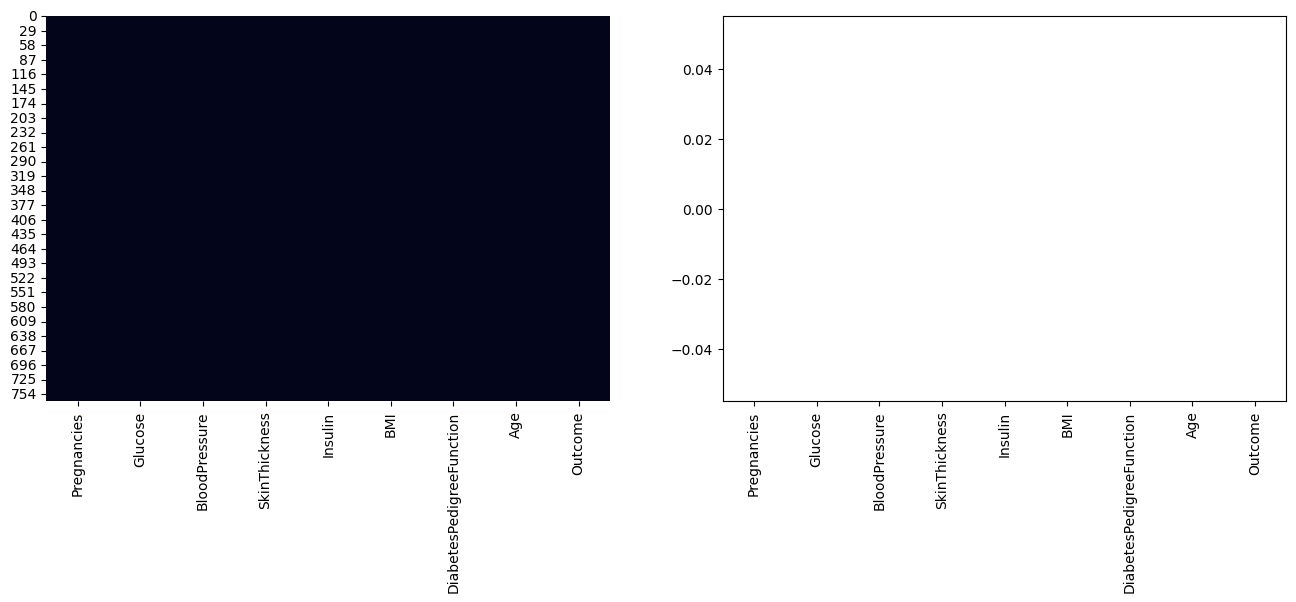

In [7]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
sns.heatmap(diabetes_df.isnull(), cbar=False, ax=ax1)
percent_missing = diabetes_df.isnull().mean() * 100
sns.barplot(x=percent_missing.index, y=percent_missing ,ax=ax2)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Distribution of Outcome')

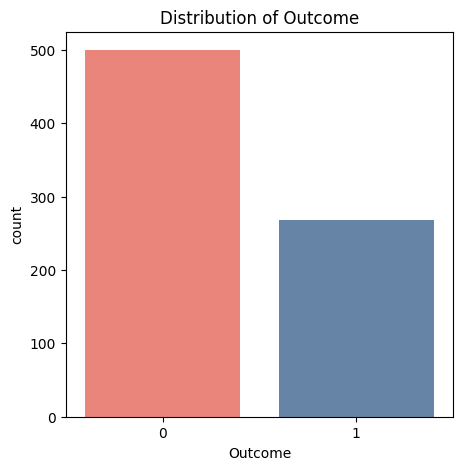

In [8]:
num_cols=diabetes_df.columns
rcParams['figure.figsize'] =5,5

sns.countplot(diabetes_df['Outcome'],palette=["#FC766AFF","#5B84B1FF"]).set_title('Distribution of Outcome')

In [9]:
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


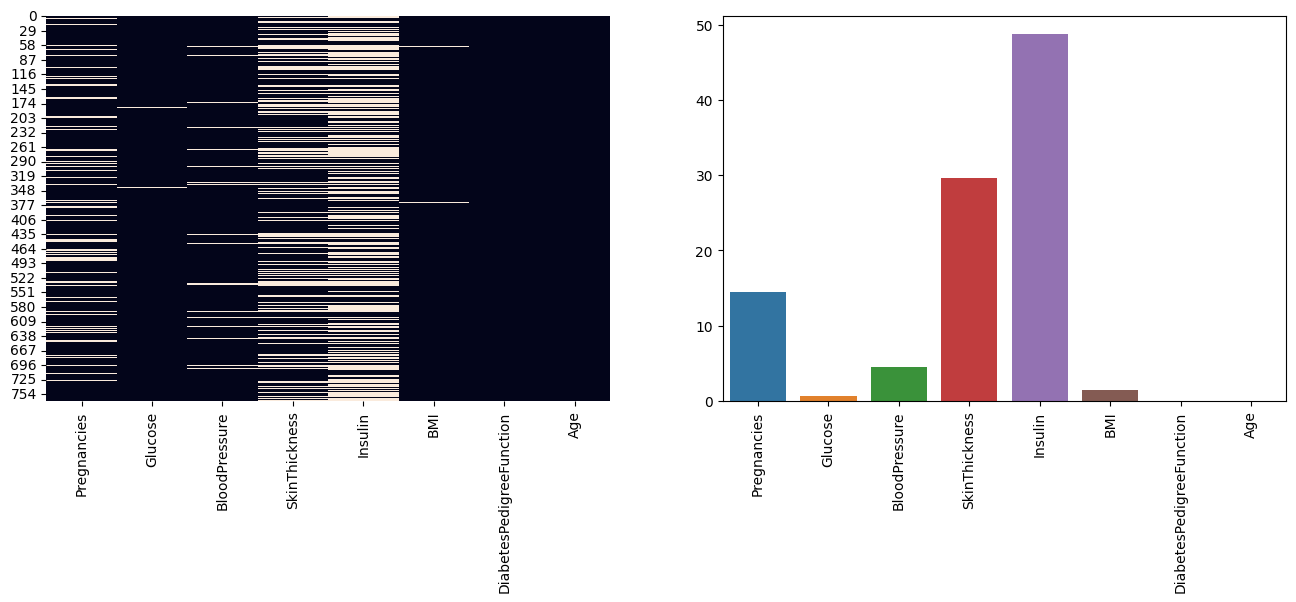

In [9]:
#Replace zeros with nan
d_copy = diabetes_df.copy()
d_copy=d_copy.drop(columns=['Outcome'],axis=1)
d_copy = d_copy.replace(0,np.nan)
#sns.heatmap(d_copy.isnull(),cmap = 'magma',cbar = False);

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))
sns.heatmap(d_copy.isnull(), cbar=False, ax=ax1)
percent_missing = d_copy.isnull().mean() * 100
sns.barplot(x=percent_missing.index, y=percent_missing ,ax=ax2)
plt.xticks(rotation=90)
plt.show()

In [10]:
X = diabetes_df.iloc[:,:-1]
y = diabetes_df.iloc[:,-1]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)
X_train=pd.concat([X_train, y_train], axis=1)
X_test=pd.concat([X_test, y_test], axis=1)
X_train.to_csv('train_data.csv', index=False)
X_test.to_csv('test_data.csv', index=False)
print(X_train.shape)
print(y_train.shape)

(576, 9)
(576,)


<Figure size 3000x1500 with 0 Axes>

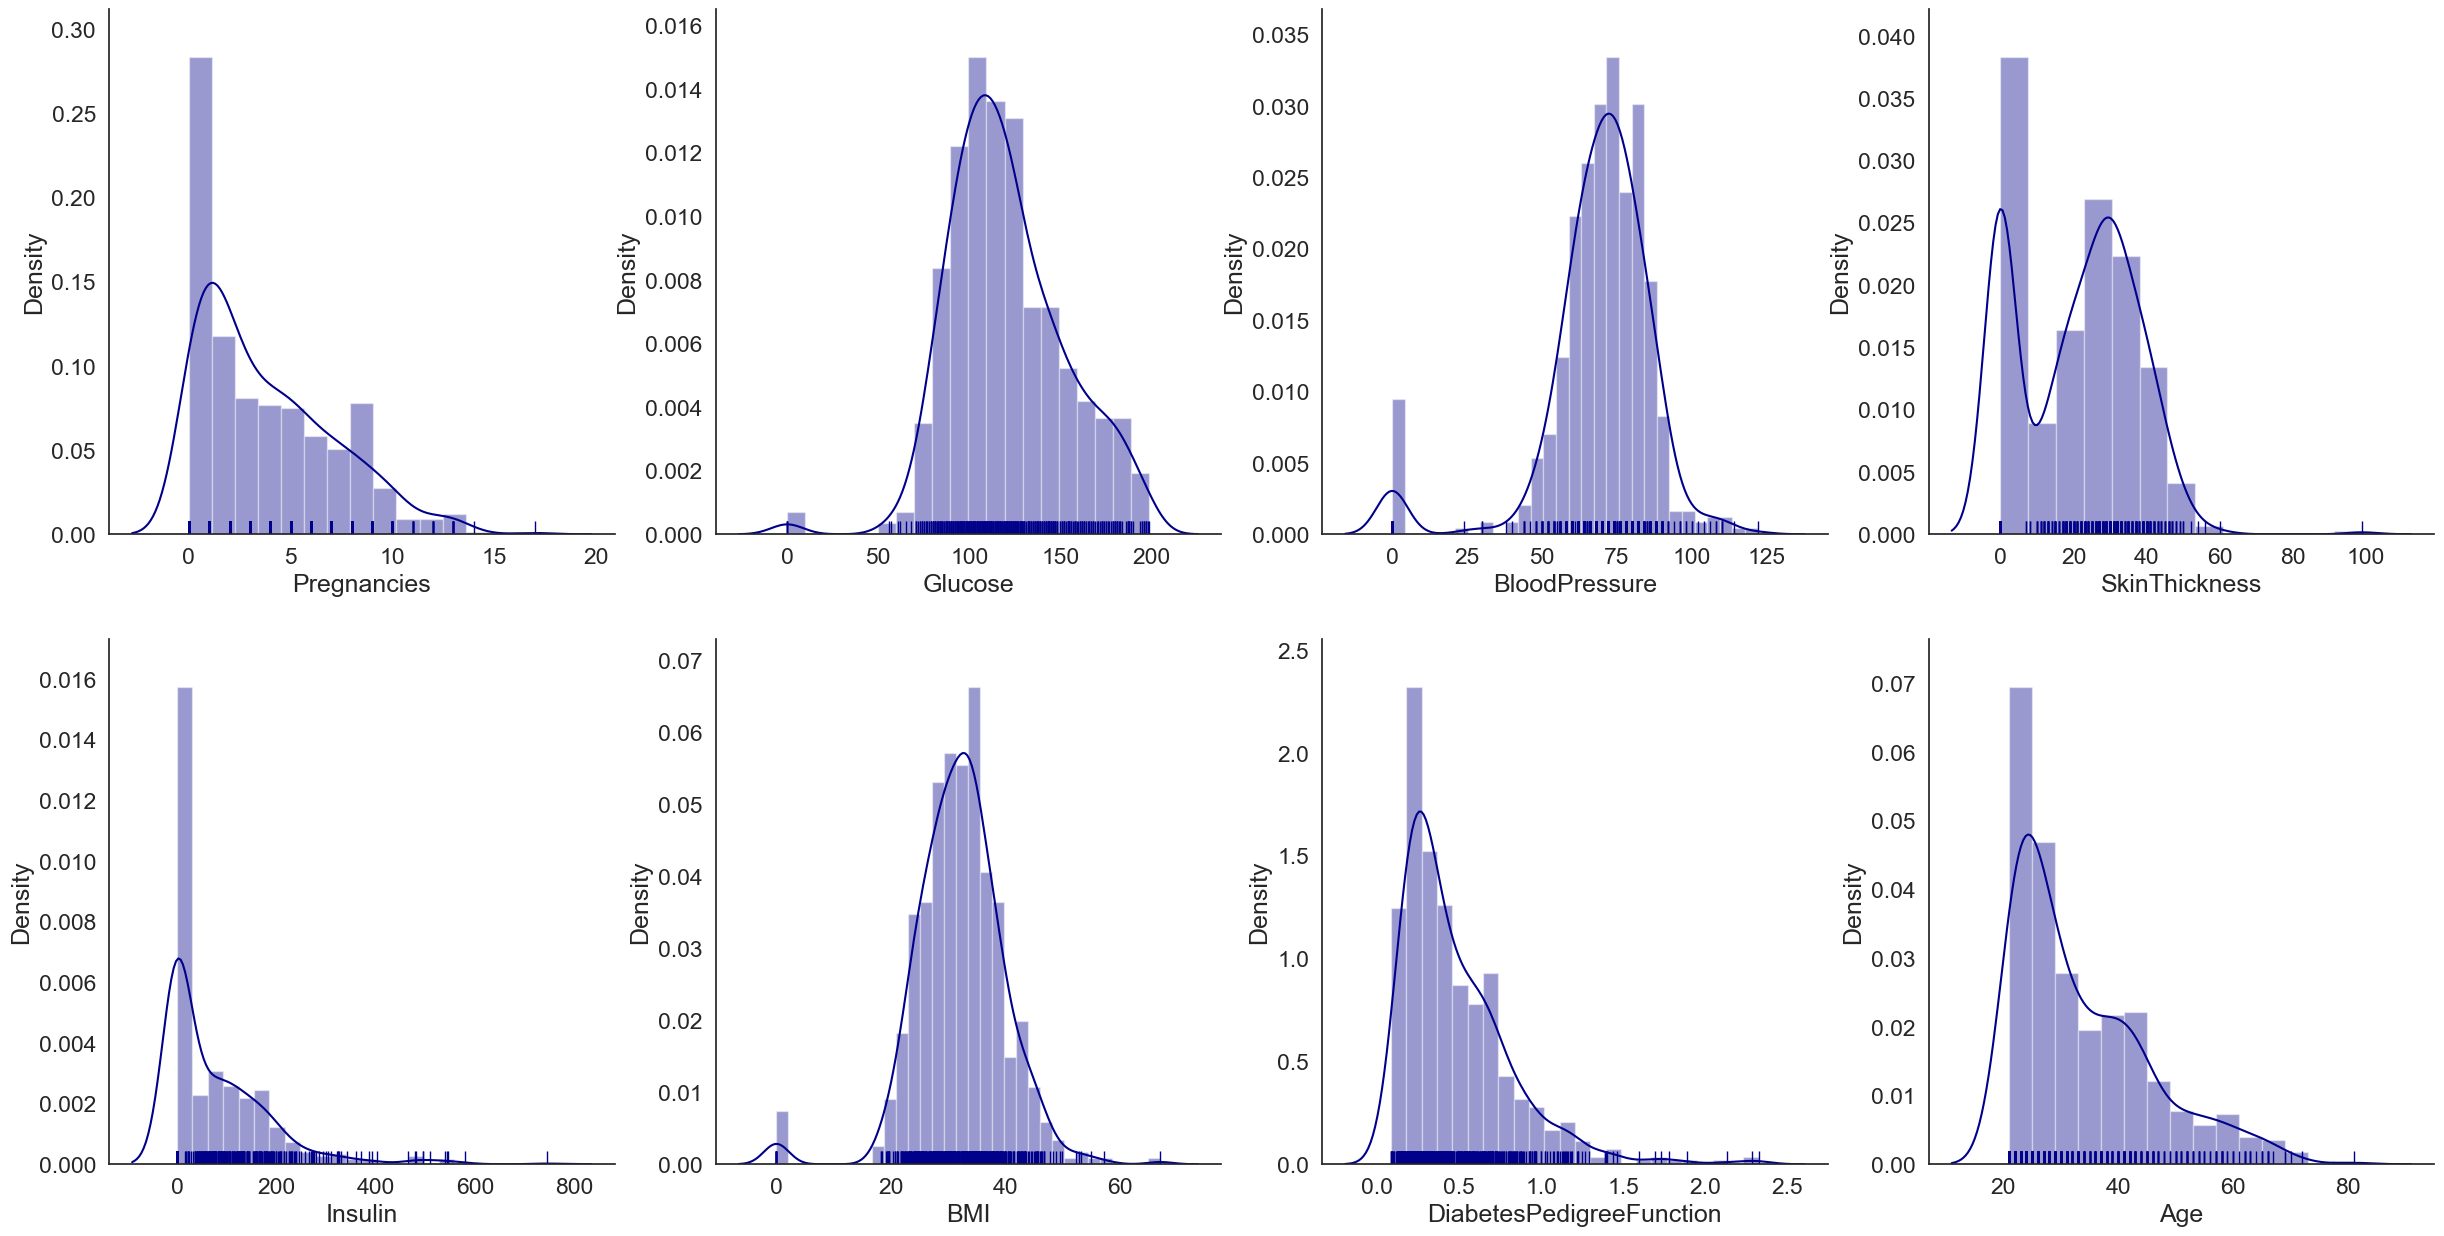

In [13]:
rcParams['figure.figsize'] =30,15
sns.set(font_scale = 1.5)
sns.set_style("white")
plt.subplots_adjust(hspace=1)
fig, axes = plt.subplots(2, 4)
for i in range(4):
    sns.distplot(X_train[num_cols[i]],ax = axes[0,i],rug=True,color='darkblue')
    #sns.boxplot(diabetes_df[num_cols[i]],ax = axes[1,i],color='red')  
    #stats.probplot(diabetes_df[num_cols[i]],plot = axes[2,i])
    sns.despine()
for i in range(4,8):
    sns.distplot(X_train[num_cols[i]],ax = axes[1,i-4],rug=True,color='darkblue')
    #sns.boxplot(diabetes_df[num_cols[i]],ax = axes[4,i-4],color='red')  
    #stats.probplot(diabetes_df[num_cols[i]],plot = axes[5,i-4])
    sns.despine()
    #5B84B1FF

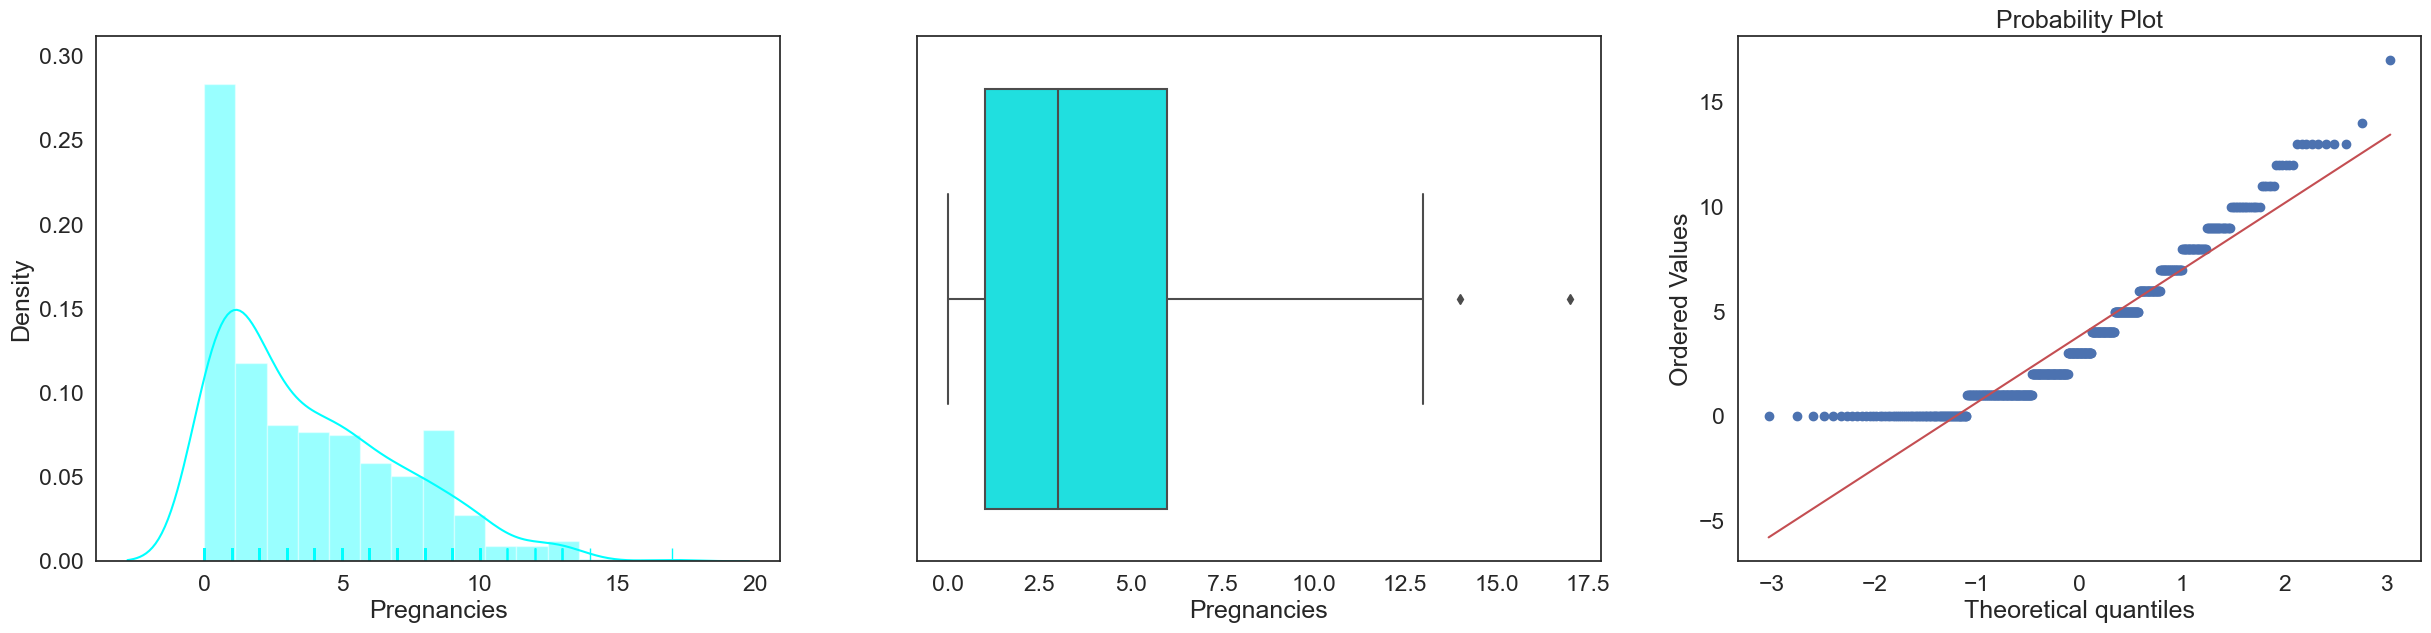

In [14]:
fig, axes = plt.subplots(1,3)
for i in range(1):
    sns.distplot(X_train[num_cols[0]],ax = plt.subplot(2,3,1)  ,rug=True,color='Aqua')
    sns.boxplot(X_train[num_cols[0]],ax = plt.subplot(2,3,2)  ,color='Aqua')  
    stats.probplot(X_train[num_cols[0]],plot = plt.subplot(2,3,3))  

In [15]:
print(X_train.shape)
print(y_train.shape)

(576, 9)
(576,)


In [12]:
#Treating Outlier and then verifying it
X_train = out_remove('Pregnancies',X_train,'both',1.5)
#---------------------
X_test = out_remove('Pregnancies',X_test,'both',1.5)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
751,1,121,78,39,74,39.0,0.261,28,0
358,12,88,74,40,54,35.3,0.378,48,0
718,1,108,60,46,178,35.5,0.415,24,0
536,0,105,90,0,0,29.6,0.197,46,0
651,1,117,60,23,106,33.8,0.466,27,0
...,...,...,...,...,...,...,...,...,...
676,9,156,86,0,0,24.8,0.230,53,1
113,4,76,62,0,0,34.0,0.391,25,0
556,1,97,70,40,0,38.1,0.218,30,0
152,9,156,86,28,155,34.3,1.189,42,1


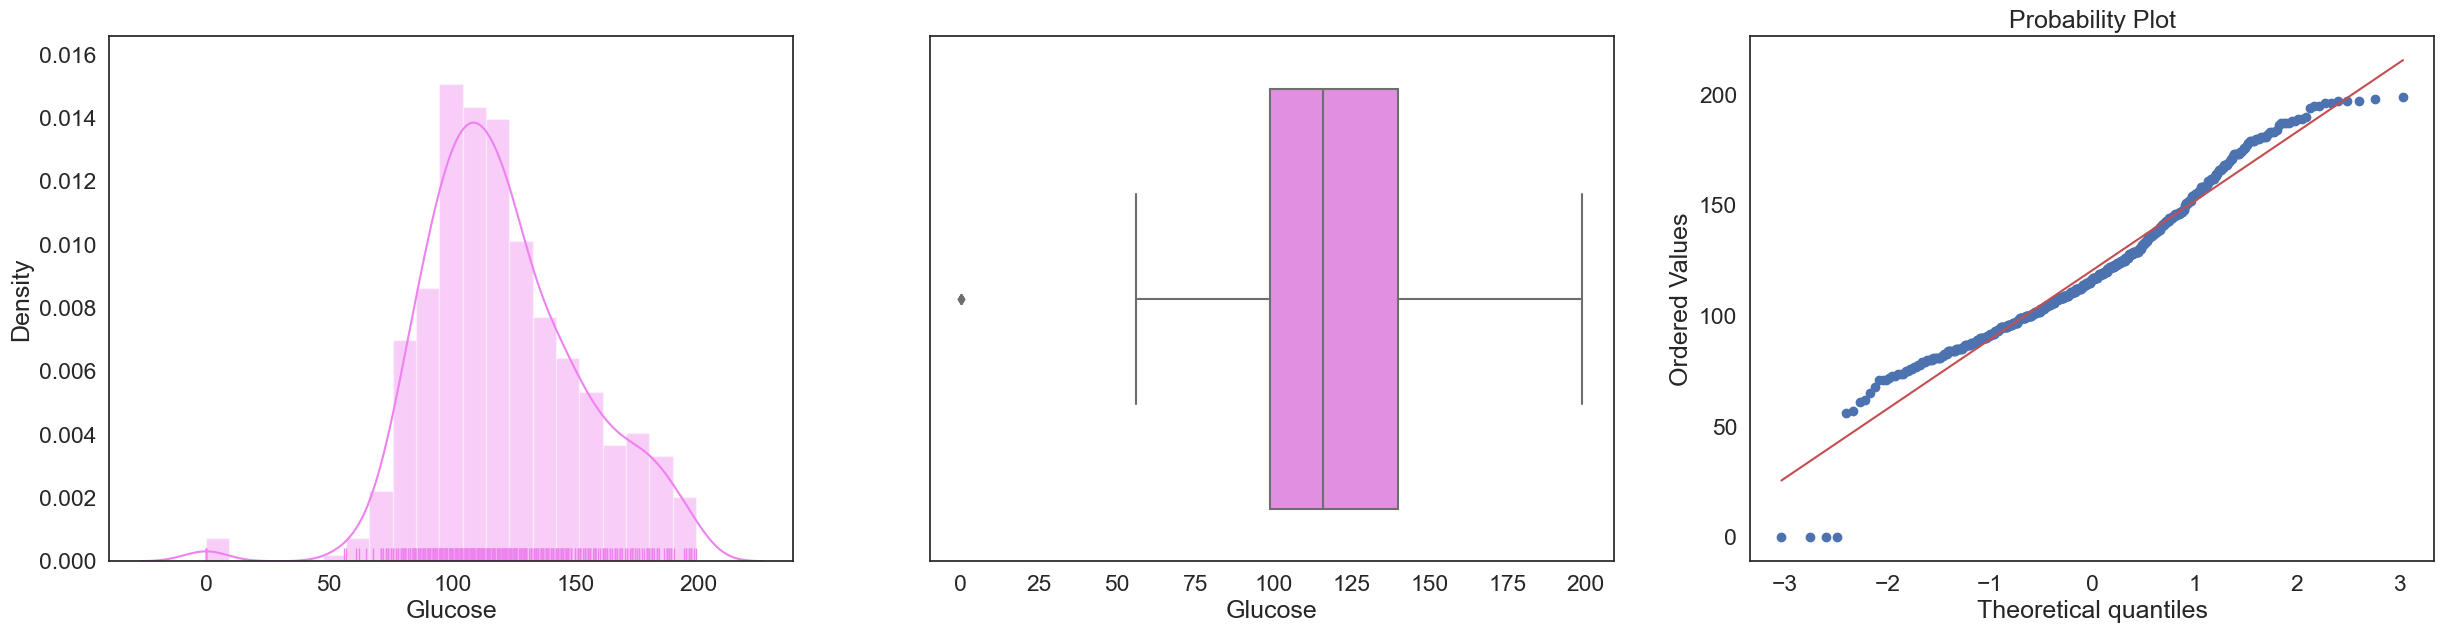

In [17]:
fig, axes = plt.subplots(1,3)
for i in range(1):
    sns.distplot(X_train[num_cols[1]],ax = plt.subplot(2,3,1)  ,rug=True,color='Violet')
    sns.boxplot(X_train[num_cols[1]],ax = plt.subplot(2,3,2)  ,color='Violet')  
    stats.probplot(X_train[num_cols[1]],plot = plt.subplot(2,3,3)) 


In [13]:
X_train['Glucose'] = X_train['Glucose'].replace(0,X_train['Glucose'].mean())
#------------------
X_test['Glucose'] = X_test['Glucose'].replace(0,X_test['Glucose'].mean())

In [14]:
X_train = out_remove('Glucose',X_train,'both',1.5)
#-----------------
X_test = out_remove('Glucose',X_test,'both',1.5)

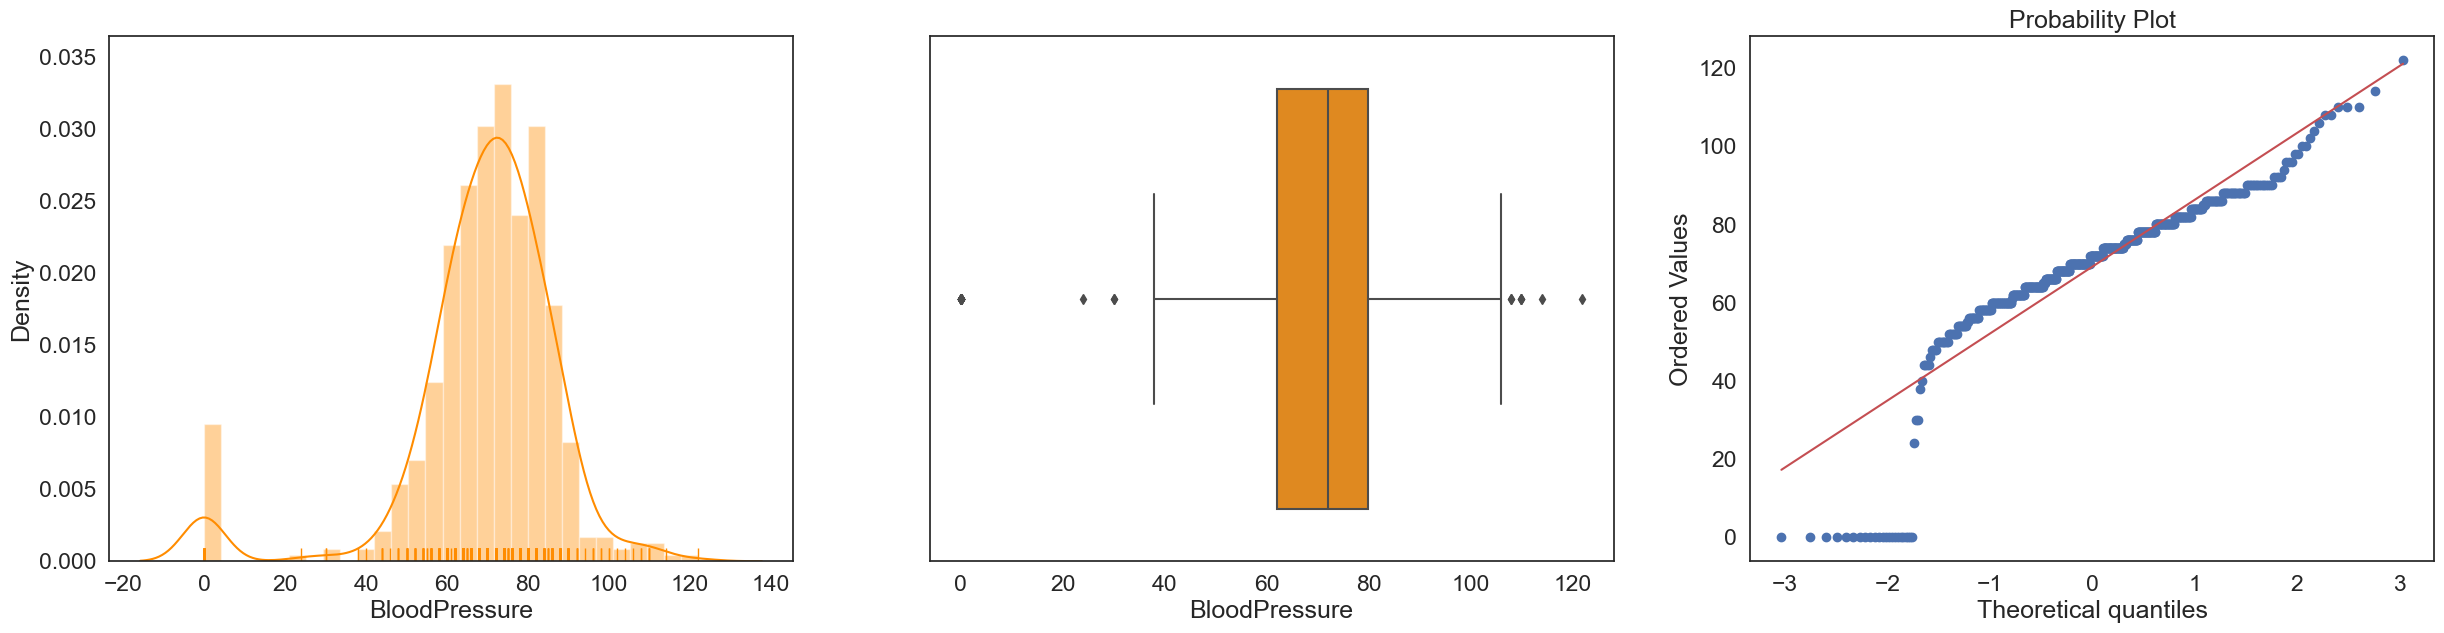

In [20]:
fig, axes = plt.subplots(1,3)
for i in range(1):
    sns.distplot(X_train[num_cols[2]],ax = plt.subplot(2,3,1)  ,rug=True,color='DarkOrange')
    sns.boxplot(X_train[num_cols[2]],ax = plt.subplot(2,3,2)  ,color='DarkOrange')  
    stats.probplot(X_train[num_cols[2]],plot = plt.subplot(2,3,3)) 

In [15]:
X_train['BloodPressure'] = X_train['BloodPressure'].replace(0,X_train['BloodPressure'].median())
#------------
X_test['BloodPressure'] = X_test['BloodPressure'].replace(0,X_test['BloodPressure'].median())

In [16]:
X_train = out_remove('BloodPressure',X_train,'lower',1.5)
#------------
X_test = out_remove('BloodPressure',X_test,'lower',1.5)

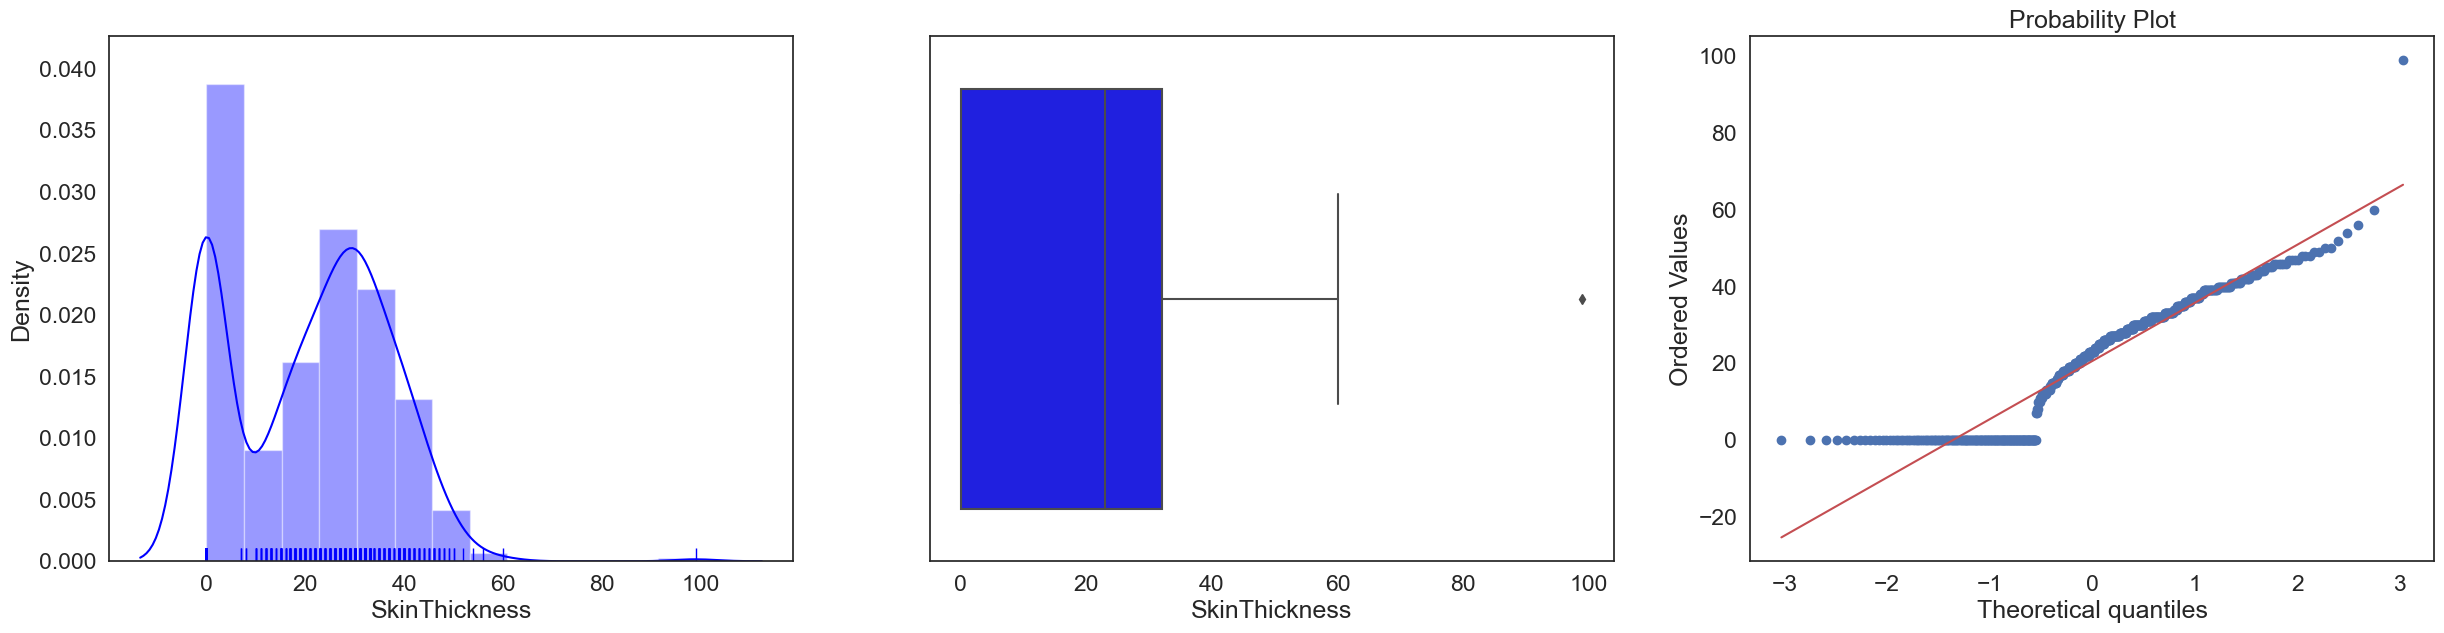

In [23]:
fig, axes = plt.subplots(1,3)
for i in range(1):
    sns.distplot(X_train[num_cols[3]],ax = plt.subplot(2,3,1)  ,rug=True,color='blue')
    sns.boxplot(X_train[num_cols[3]],ax = plt.subplot(2,3,2)  ,color='blue')  
    stats.probplot(X_train[num_cols[3]],plot = plt.subplot(2,3,3)) 

In [17]:
X_train['SkinThickness'] = X_train['SkinThickness'].replace(0,X_train['SkinThickness'].mean())
#-----------
X_test['SkinThickness'] = X_test['SkinThickness'].replace(0,X_test['SkinThickness'].mean())

In [18]:
X_train = out_remove('SkinThickness',X_train,'both',1.5)
#------------
X_test = out_remove('SkinThickness',X_test,'both',1.5)

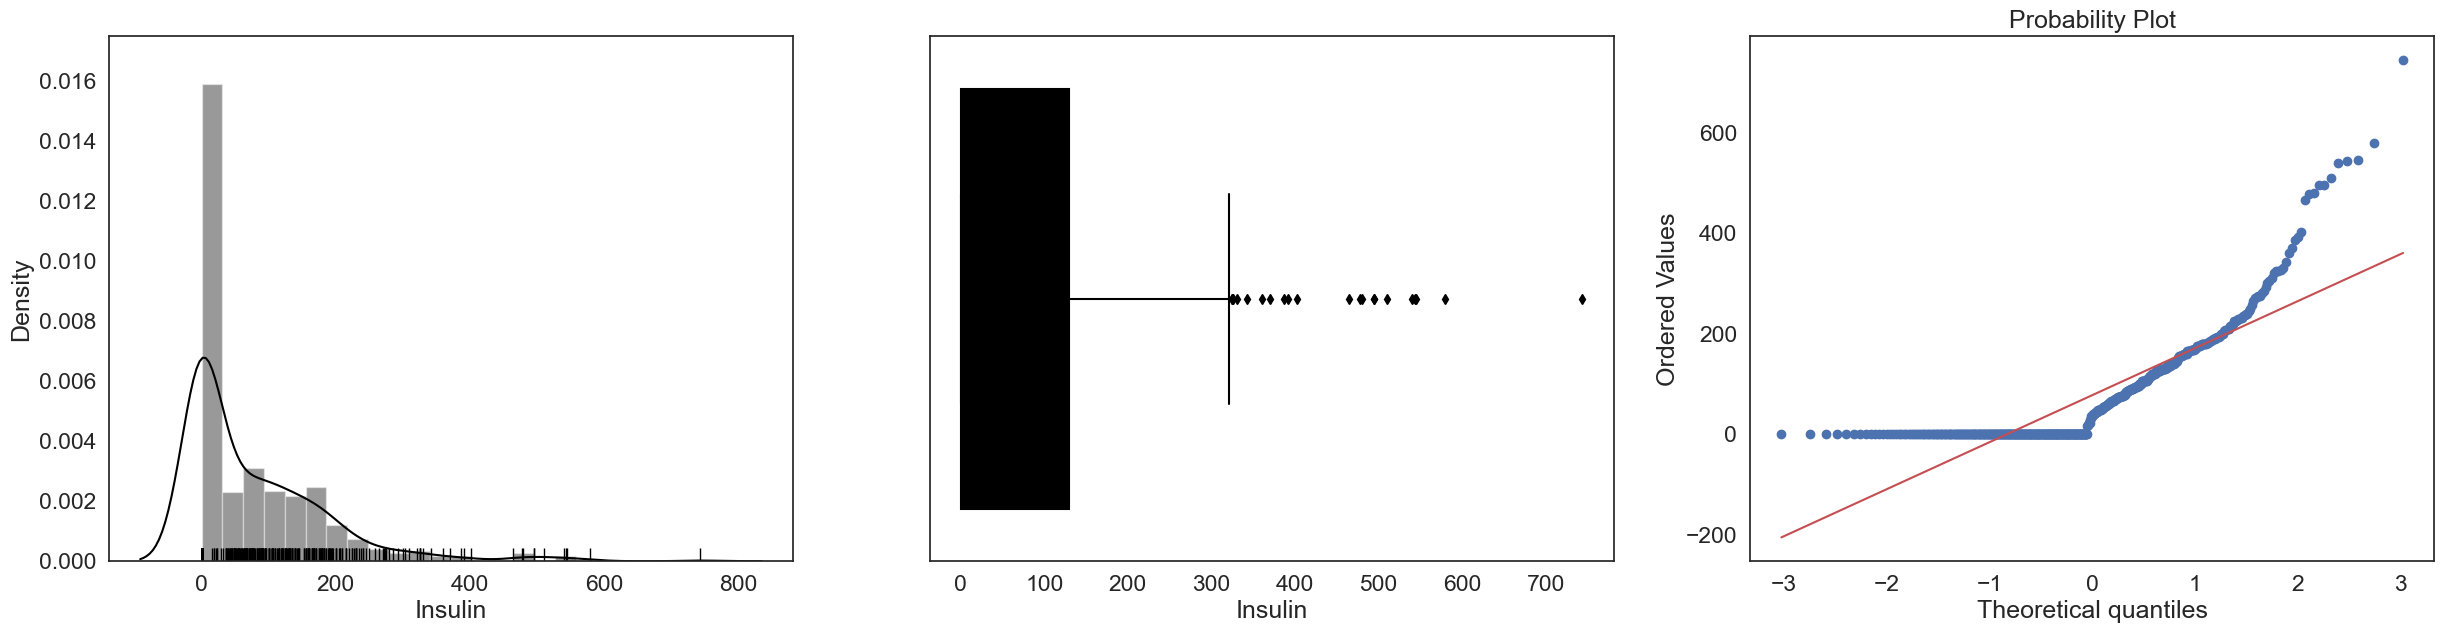

In [26]:
fig, axes = plt.subplots(1,3)
for i in range(1):
    sns.distplot(X_train[num_cols[4]],ax = plt.subplot(2,3,1)  ,rug=True,color='black')
    sns.boxplot(X_train[num_cols[4]],ax = plt.subplot(2,3,2)  ,color='black')  
    stats.probplot(X_train[num_cols[4]],plot = plt.subplot(2,3,3)) 

In [19]:
X_train['Insulin'] = X_train['Insulin'].replace(0,X_train['Insulin'].median())
#-----------
X_test['Insulin'] = X_test['Insulin'].replace(0,X_test['Insulin'].median())

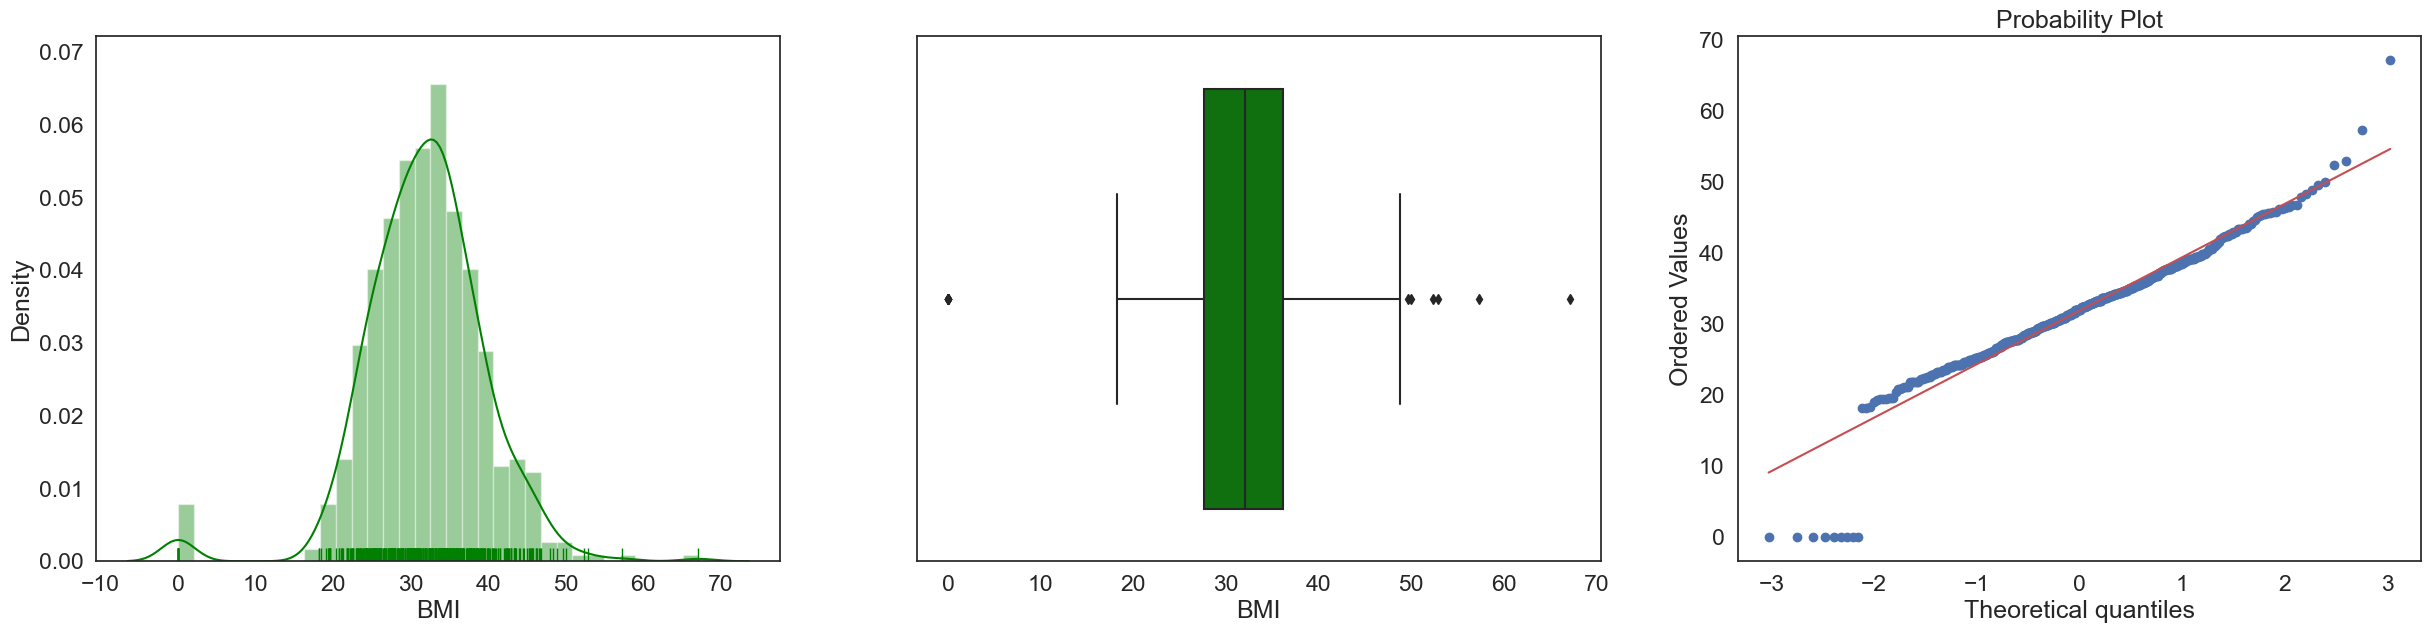

In [28]:
fig, axes = plt.subplots(1,3)
for i in range(1):
    sns.distplot(X_train[num_cols[5]],ax = plt.subplot(2,3,1)  ,rug=True,color='green')
    sns.boxplot(X_train[num_cols[5]],ax = plt.subplot(2,3,2)  ,color='green')  
    stats.probplot(X_train[num_cols[5]],plot = plt.subplot(2,3,3)) 

In [20]:
X_train['BMI'] = X_train['BMI'].replace(0,X_train['BMI'].mean())
#----------
X_test['BMI'] = X_test['BMI'].replace(0,X_test['BMI'].mean())

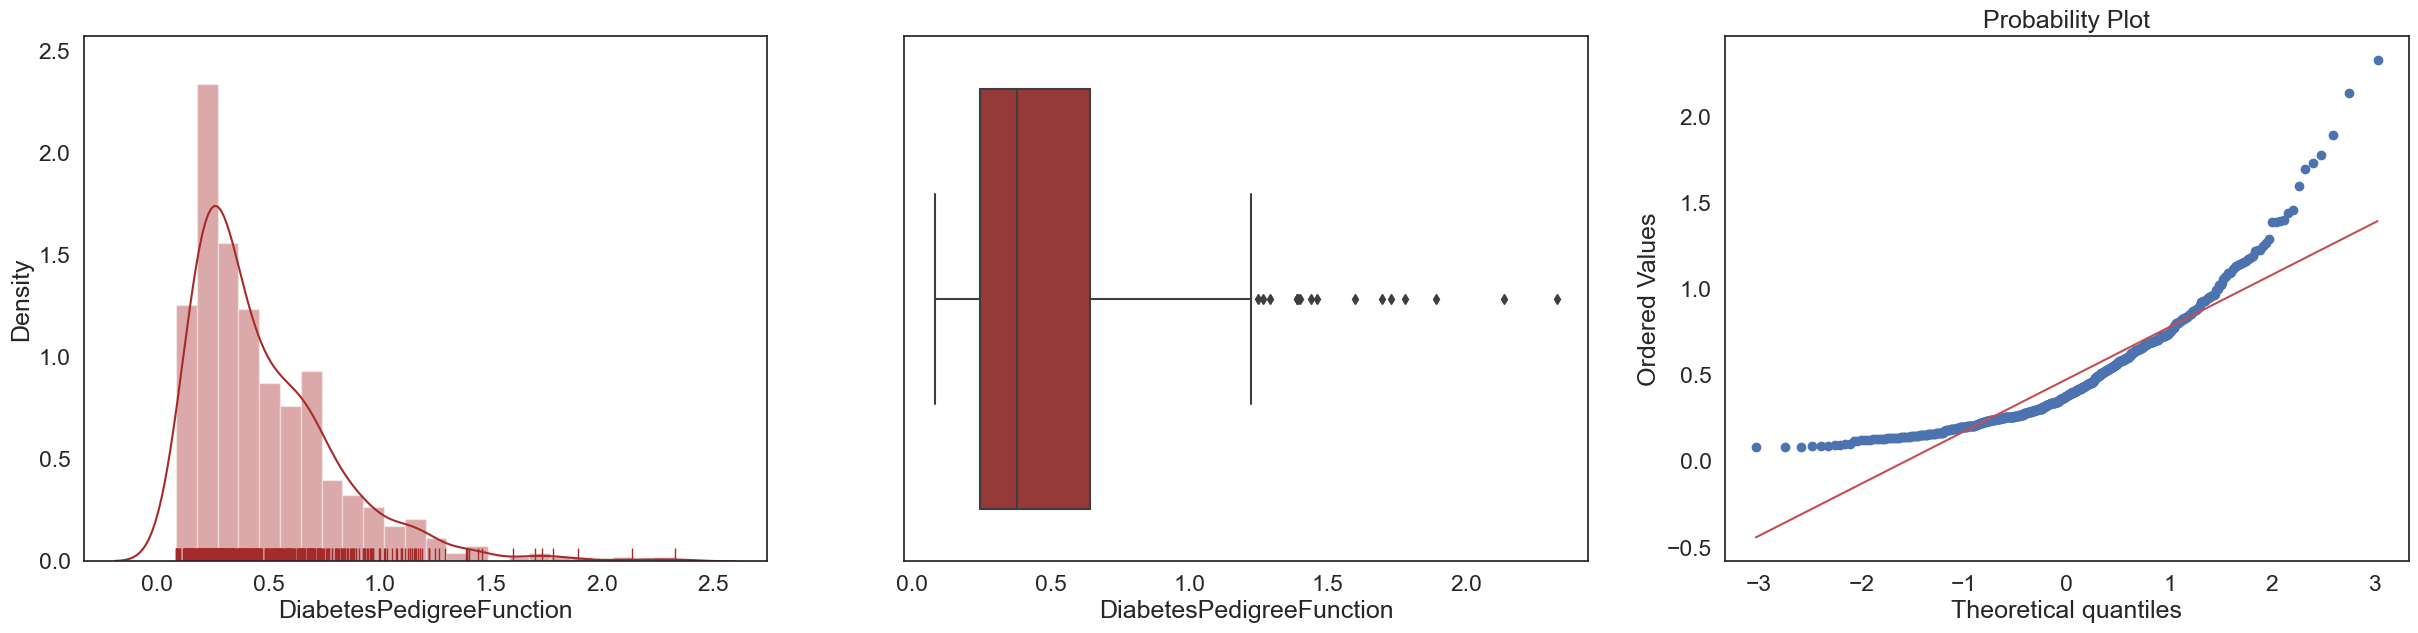

In [30]:
fig, axes = plt.subplots(1,3)
for i in range(1):
    sns.distplot(X_train[num_cols[6]],ax = plt.subplot(2,3,1)  ,rug=True,color='brown')
    sns.boxplot(X_train[num_cols[6]],ax = plt.subplot(2,3,2)  ,color='brown')  
    stats.probplot(X_train[num_cols[6]],plot = plt.subplot(2,3,3)) 

In [21]:
X_train = out_remove('DiabetesPedigreeFunction',X_train,'both',1.5)
#------------
X_test = out_remove('DiabetesPedigreeFunction',X_test,'both',1.5)

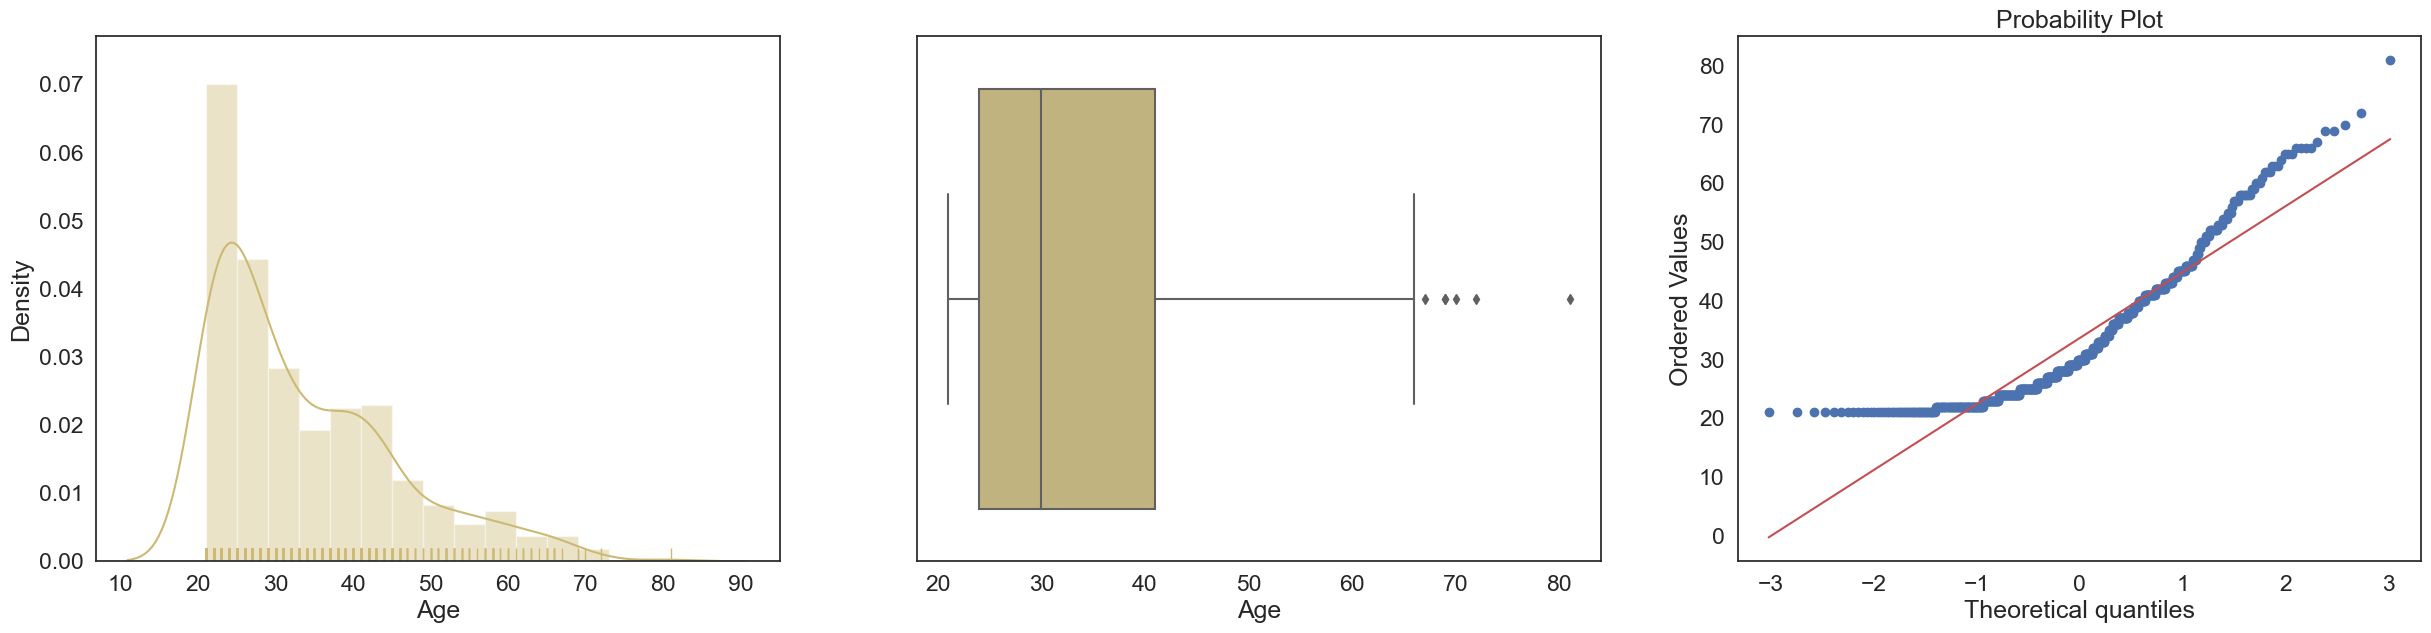

In [32]:
fig, axes = plt.subplots(1,3)
for i in range(1):
    sns.distplot(X_train[num_cols[7]],ax = plt.subplot(2,3,1)  ,rug=True,color='y')
    sns.boxplot(X_train[num_cols[7]],ax = plt.subplot(2,3,2)  ,color='y')  
    stats.probplot(X_train[num_cols[7]],plot = plt.subplot(2,3,3)) 

<Figure size 3000x1500 with 0 Axes>

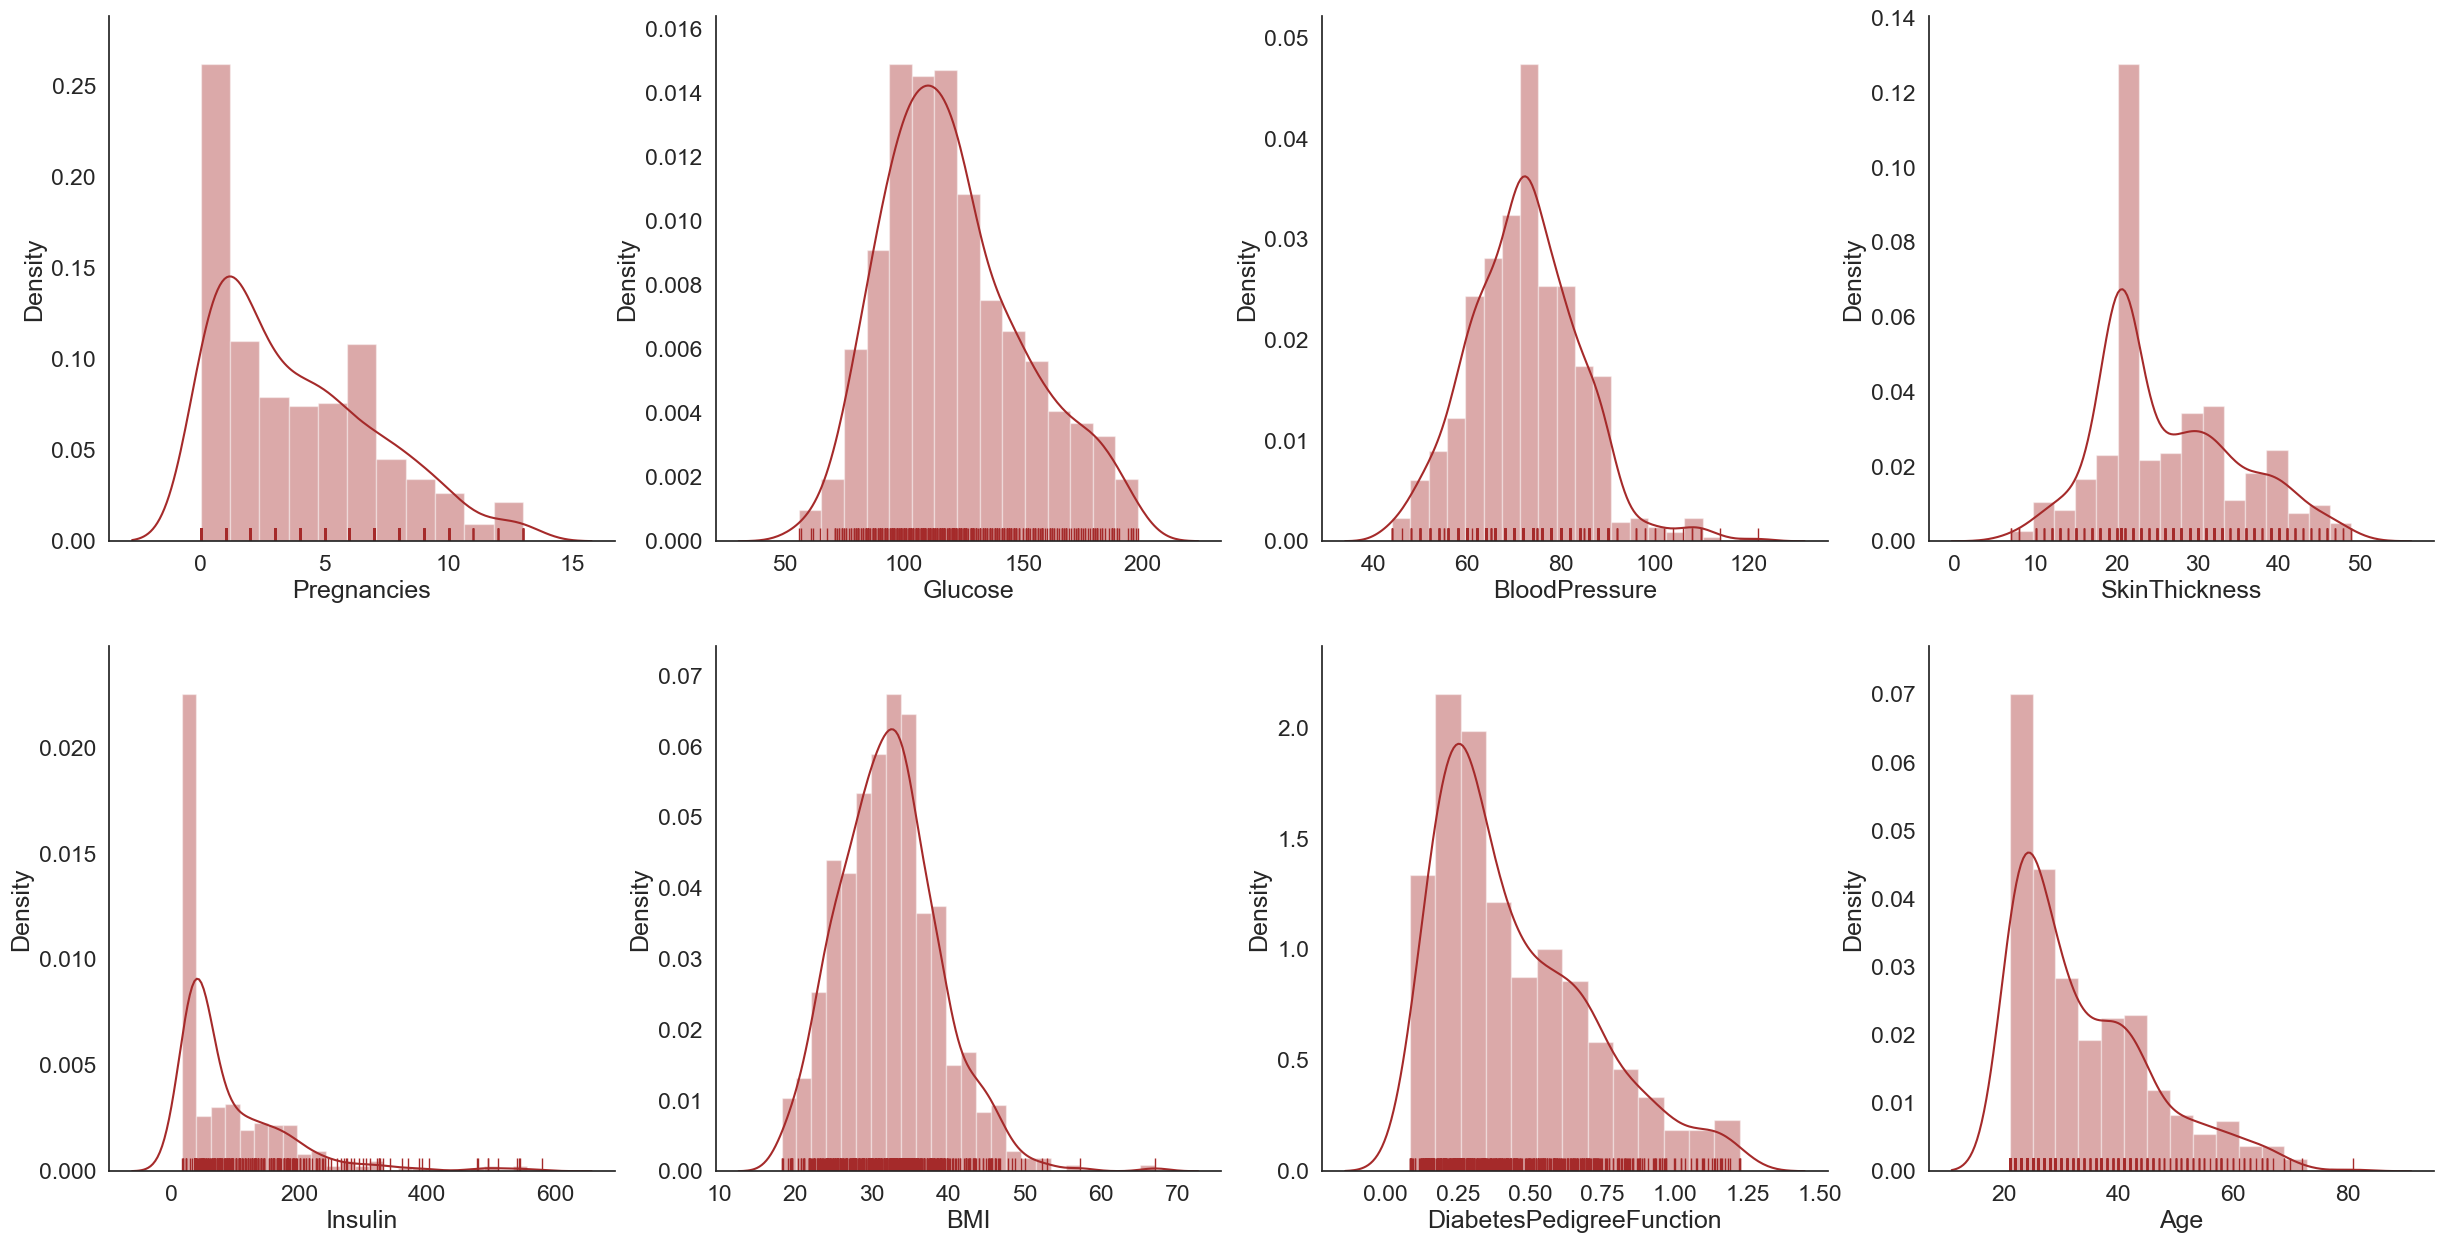

In [33]:
rcParams['figure.figsize'] =30,15
sns.set(font_scale = 1.5)
sns.set_style("white")
plt.subplots_adjust(hspace=1)
fig, axes = plt.subplots(2, 4)
for i in range(4):
    sns.distplot(X_train[num_cols[i]],ax = axes[0,i],rug=True,color='brown')
    #sns.boxplot(diabetes_df[num_cols[i]],ax = axes[1,i],color='red')  
    #stats.probplot(diabetes_df[num_cols[i]],plot = axes[2,i])
    sns.despine()
for i in range(4,8):
    sns.distplot(X_train[num_cols[i]],ax = axes[1,i-4],rug=True,color='brown')
    #sns.boxplot(diabetes_df[num_cols[i]],ax = axes[4,i-4],color='red')  
    #stats.probplot(diabetes_df[num_cols[i]],plot = axes[5,i-4])
    sns.despine()

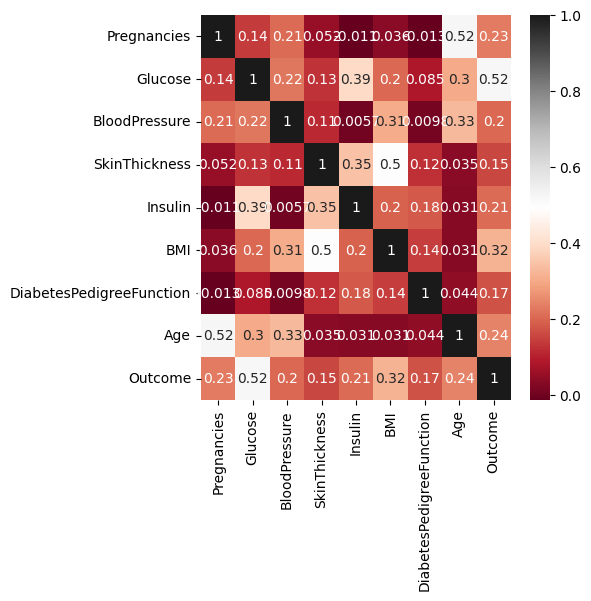

In [22]:
#plt.figure(figsize = (35,15))
sns.heatmap(X_train.corr(),cmap = 'RdGy',annot = True,cbar=True);

(4.0, 60.0)

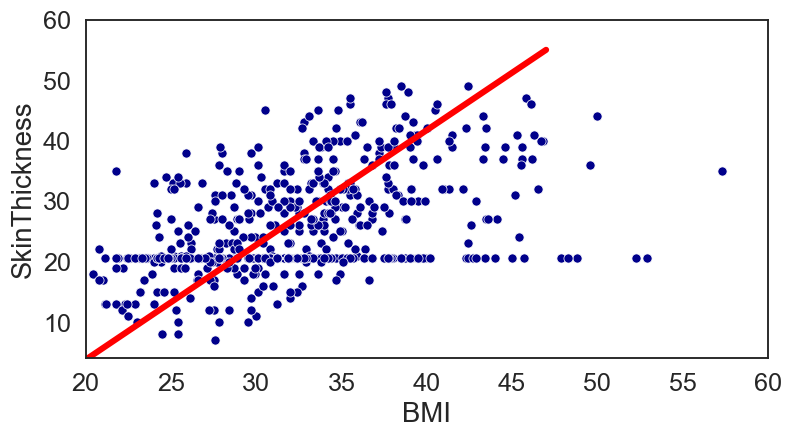

In [35]:
plt.figure(figsize=(8,4),dpi=110)
sns.scatterplot(data=X_train, x='BMI', y='SkinThickness', color='darkblue');
plt.plot([18, 47], [0, 55], 'red', linewidth=4)
plt.xlim(20, 60)
plt.ylim(4, 60)

(18.0, 90.0)

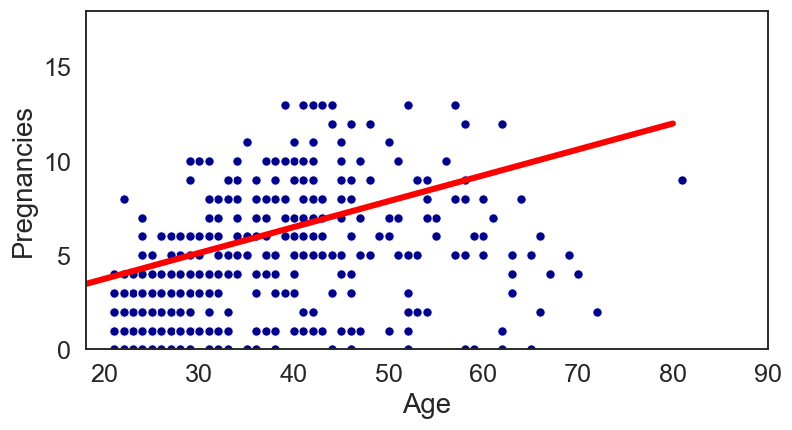

In [36]:
plt.figure(figsize=(8,4),dpi=110)
sns.scatterplot(data=X_train, x='Age', y='Pregnancies',color='darkblue');
plt.plot([0, 80], [1, 12], 'red', linewidth=4)
plt.ylim(0, 18)
plt.xlim(18, 90)

<AxesSubplot: xlabel='Importance', ylabel='Feature'>

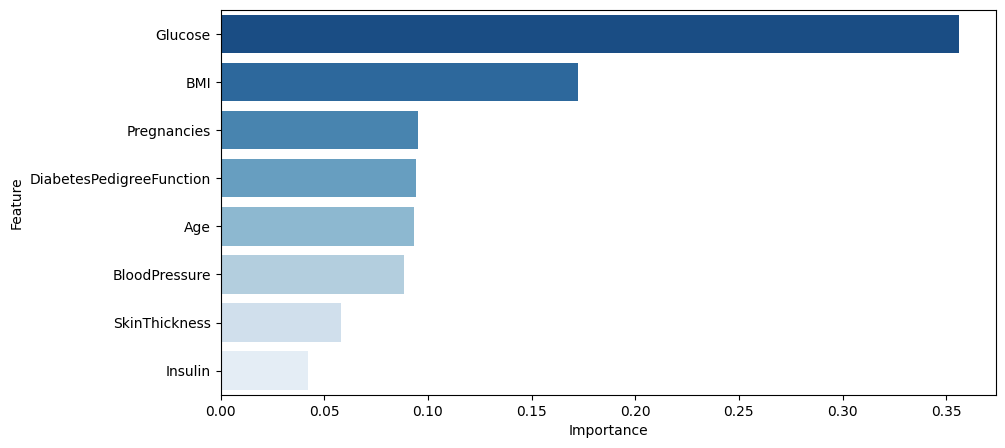

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Train a decision tree model
plt.figure(figsize=(10, 5))

model = DecisionTreeClassifier()
z_copy = X_train.copy()
y = z_copy.iloc[:,-1]
X = z_copy.iloc[:,:-1]
model.fit(X, y)
importances = model.feature_importances_
#print(model.feature_importances_)
indices = np.argsort(importances)[::-1]
df = pd.DataFrame({'Feature': X.columns[indices], 'Importance': importances[indices]})
sns.barplot(x='Importance', y='Feature', palette="Blues_r",data=df )

In [24]:
X_train.drop(['Insulin', 'SkinThickness'], axis=1, inplace=True)
X_test.drop(['Insulin', 'SkinThickness'], axis=1, inplace=True)

<AxesSubplot: xlabel='Glucose', ylabel='DiabetesPedigreeFunction'>

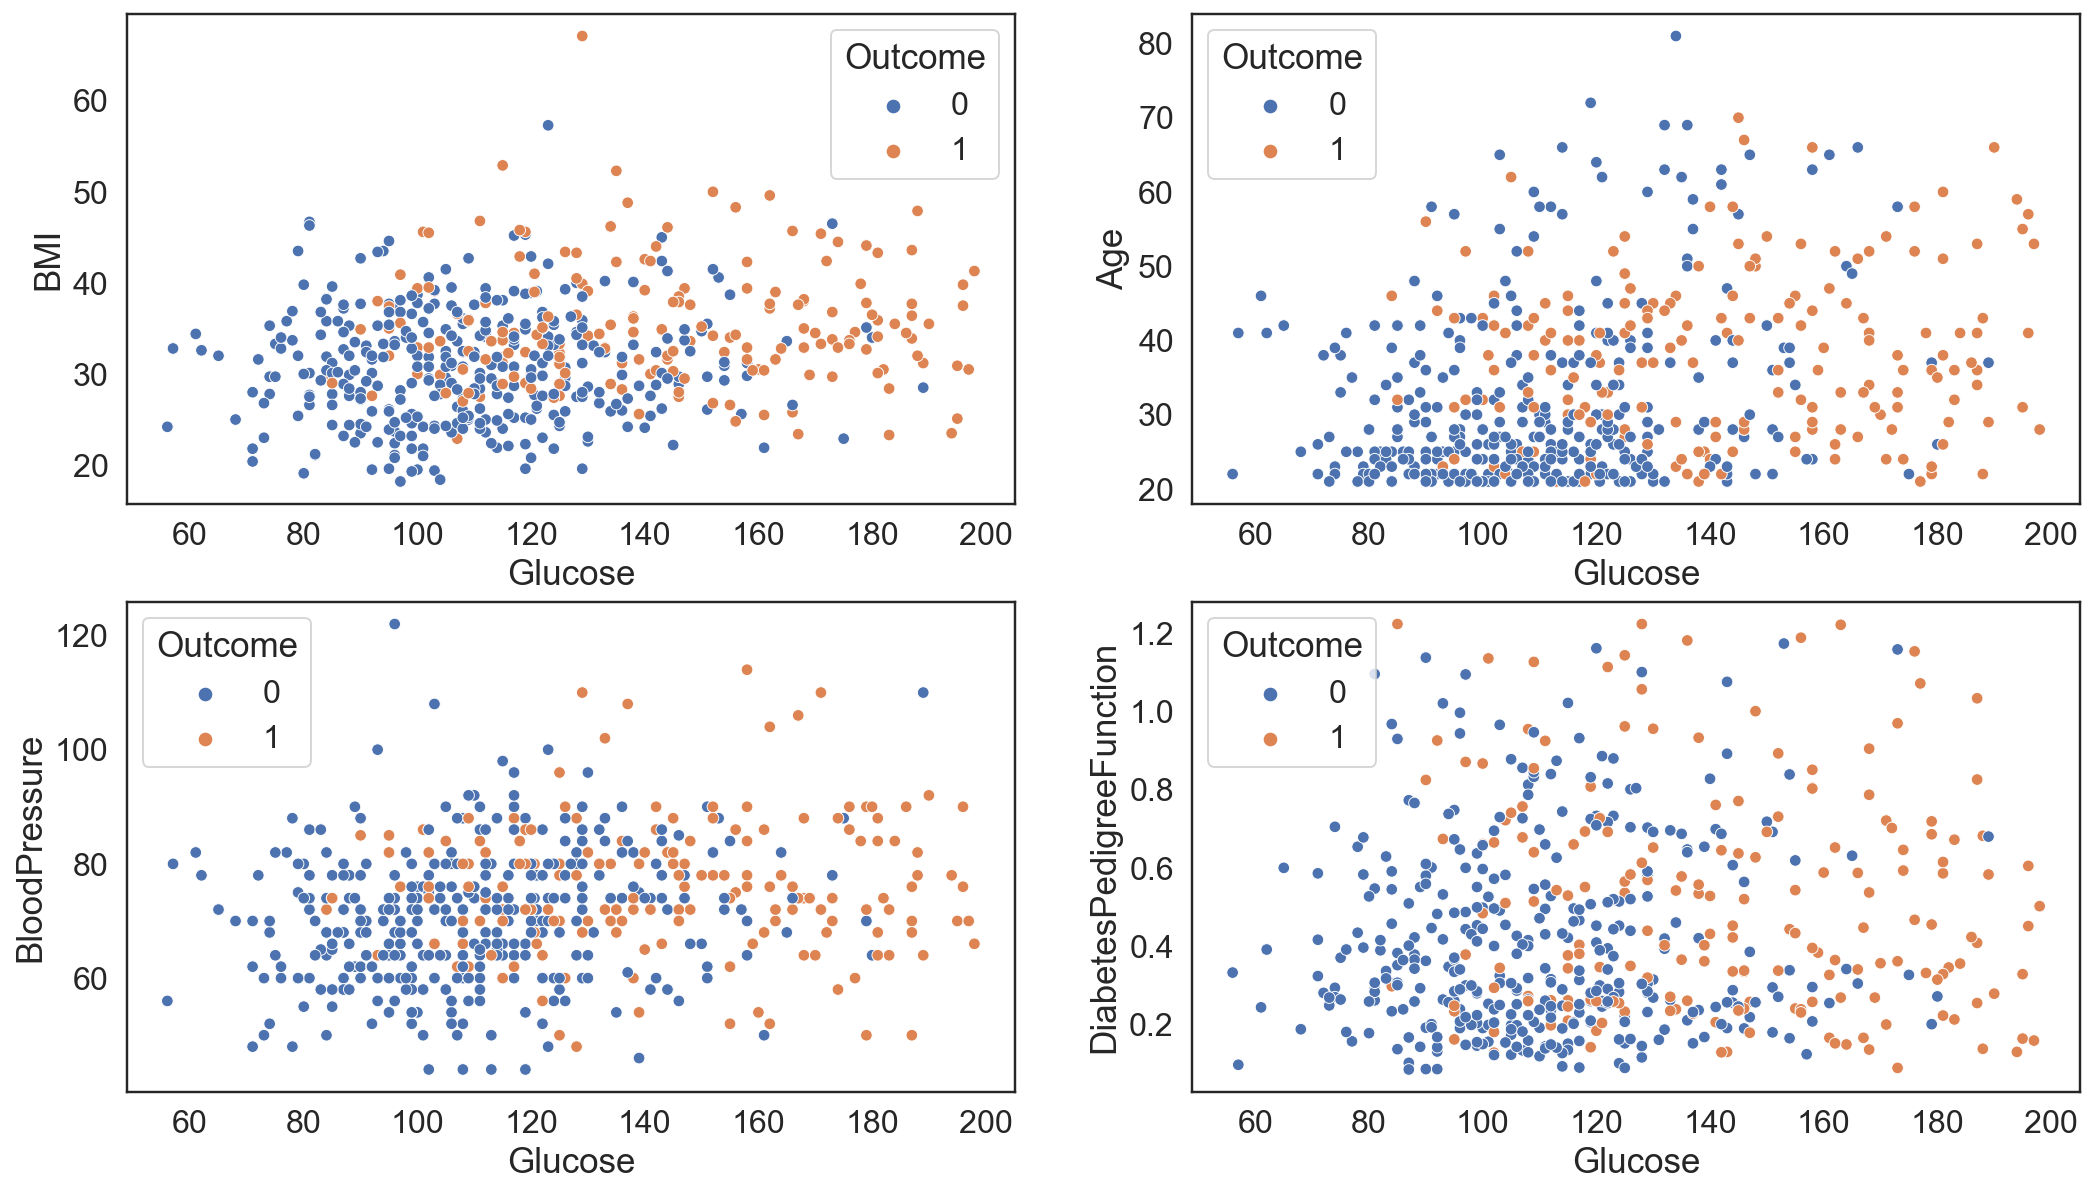

In [39]:
fig, ax = plt.subplots(2, 2, figsize=(18,10 ),dpi=140)
sns.scatterplot(data=X_train, x='Glucose', y='BMI',  hue='Outcome', ax=ax[0][0])
sns.scatterplot(data=X_train, x='Glucose', y='Age', hue='Outcome', ax=ax[0][1])
sns.scatterplot(data=X_train, x='Glucose', y='BloodPressure',  hue='Outcome', ax=ax[1][0])
sns.scatterplot(data=X_train, x='Glucose', y='DiabetesPedigreeFunction',  hue='Outcome', ax=ax[1][1])

In [25]:
y_train = X_train.iloc[:,-1]
X_train = X_train.iloc[:,:-1]
y_test = X_test.iloc[:,-1]
X_test = X_test.iloc[:,:-1]
X_train

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age
751,1,121.0,78,39.0,0.261,28
358,12,88.0,74,35.3,0.378,48
718,1,108.0,60,35.5,0.415,24
536,0,105.0,90,29.6,0.197,46
651,1,117.0,60,33.8,0.466,27
...,...,...,...,...,...,...
676,9,156.0,86,24.8,0.230,53
113,4,76.0,62,34.0,0.391,25
556,1,97.0,70,38.1,0.218,30
152,9,156.0,86,34.3,1.189,42


In [45]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report,  RocCurveDisplay
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier 
from imblearn.over_sampling import SMOTE

In [46]:
SMT=SMOTE()

In [47]:
scaler= StandardScaler()

In [48]:
QUAT = QuantileTransformer(random_state=5, output_distribution='normal')

In [49]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
Param = {
    'ada__n_estimators': [10, 25, 50, 75, 100, 125, 150, 175 , 200],
    'ada__learning_rate': [0.1, 0.5, 1.0],
}
p = Pipeline([('SMT', SMT),('scaler',scaler),('ada', ada)])
Grid=GridSearchCV(p,param_grid=Param,cv=5,scoring='recall')
Grid.fit(X_train,y_train)
print(Grid.best_score_)
print(Grid.best_params_)

0.7672830725462304
{'ada__learning_rate': 0.1, 'ada__n_estimators': 75}


In [50]:
Final = AdaBoostClassifier(learning_rate= 0.5, n_estimators= 50)

Model = Pipeline([('SMT', SMT),('scaler',scaler), ('Final', Final)])
Model.fit(X_train, y_train)
Pred = Model.predict(X_test)

              precision    recall  f1-score   support

           0       0.82      0.76      0.79       121
           1       0.55      0.64      0.60        56

    accuracy                           0.72       177
   macro avg       0.69      0.70      0.69       177
weighted avg       0.74      0.72      0.73       177



Text(0, 0.5, 'True positive rate')

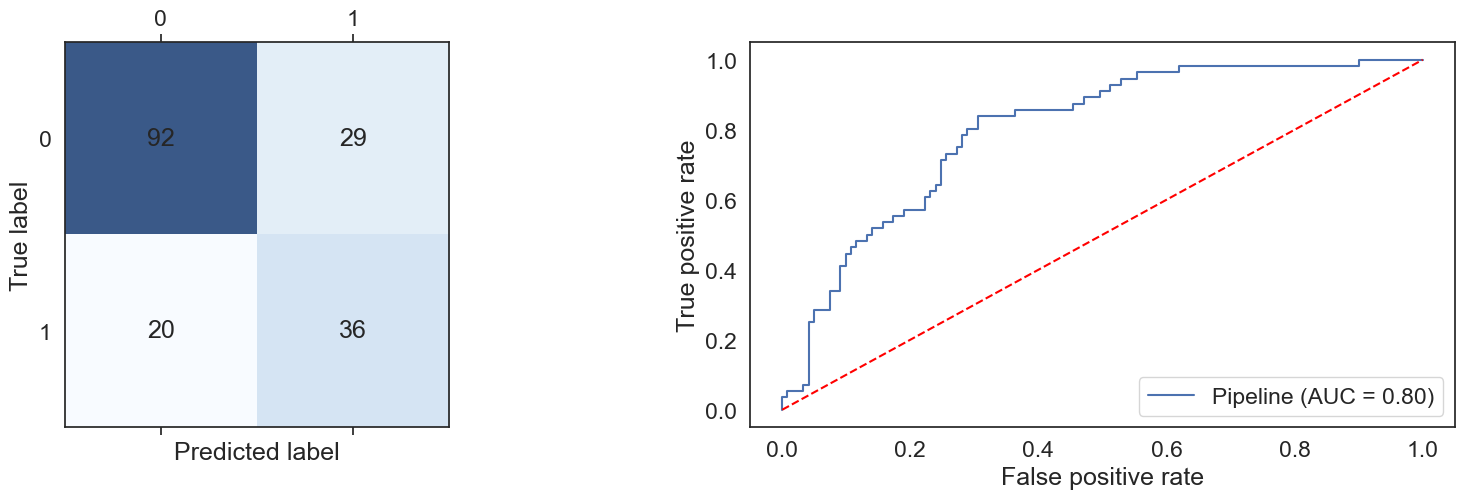

In [52]:
confusion = confusion_matrix(y_test, Pred)
print(classification_report(y_test, Pred))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1.matshow(confusion, cmap='Blues',alpha=0.8)
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        ax1.text(x=j, y=i, s=confusion[i, j], va='center', ha='center')
ax1.set_xlabel('Predicted label')
ax1.set_ylabel('True label')

RocCurveDisplay.from_estimator(Model, X_test, y_test, ax=ax2)
ax2.plot([0, 1], [0, 1], linestyle='--', color='red')
ax2.set_xlabel('False positive rate')
ax2.set_ylabel('True positive rate')

In [53]:
from sklearn.ensemble import RandomForestClassifier

RANDOM_FOREST=RandomForestClassifier()
Param = {'RANDOM_FOREST__bootstrap': [True, False],
  'RANDOM_FOREST__max_depth': [10, 20, 30, None],
  'RANDOM_FOREST__n_estimators': [200, 600, 800]}
p = Pipeline([('SMT', SMT),('scaler',scaler),('RANDOM_FOREST', RANDOM_FOREST)])
Grid=GridSearchCV(p,param_grid=Param,cv=5,scoring='recall')
Grid.fit(X_train,y_train)
print(Grid.best_score_)
print(Grid.best_params_)

0.7091038406827879
{'RANDOM_FOREST__bootstrap': True, 'RANDOM_FOREST__max_depth': 10, 'RANDOM_FOREST__n_estimators': 200}


In [54]:
Final = RandomForestClassifier(bootstrap=True,n_estimators=600,max_depth=10)

Model = Pipeline([('SMT', SMT),('scaler',scaler), ('Final', Final)])
Model.fit(X_train, y_train)
Pred = Model.predict(X_test)

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       121
           1       0.55      0.66      0.60        56

    accuracy                           0.72       177
   macro avg       0.69      0.71      0.69       177
weighted avg       0.74      0.72      0.73       177



Text(0, 0.5, 'True positive rate')

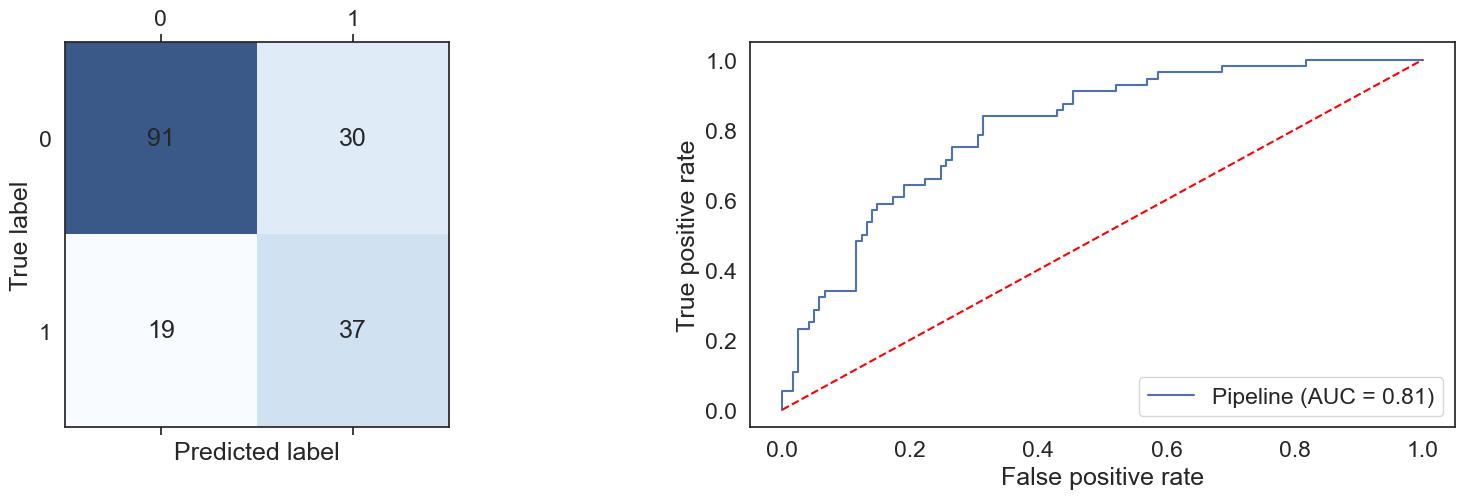

In [58]:
confusion = confusion_matrix(y_test, Pred)
print(classification_report(y_test, Pred))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1.matshow(confusion, cmap='Blues',alpha=0.8)
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        ax1.text(x=j, y=i, s=confusion[i, j], va='center', ha='center')
ax1.set_xlabel('Predicted label')
ax1.set_ylabel('True label')

RocCurveDisplay.from_estimator(Model, X_test, y_test, ax=ax2)
ax2.plot([0, 1], [0, 1], linestyle='--', color='red')
ax2.set_xlabel('False positive rate')
ax2.set_ylabel('True positive rate')

In [69]:
import pickle 
KNN=KNeighborsClassifier()
lis = list(range(1,300))
Param = {'KNN__n_neighbors': lis}
p = Pipeline([('SMT', SMT),('QUAT',QUAT),('KNN', KNN)])
Grid=GridSearchCV(p,param_grid=Param,cv=5,scoring='recall')
Grid.fit(X_train,y_train)
knnPickle = open('knnpickle_file', 'wb') 
      
# source, destination 
pickle.dump(Grid, knnPickle) 
print(Grid.best_score_)
print(Grid.best_params_)

0.8765258215962441
{'KNN__n_neighbors': 1}


In [75]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
model.fit(X_train,y_train)

#Predict Output
predicted= model.predict(y_test) # 0:Overcast, 2:Mild
print(predicted)
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, Pred))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Atilim\miniconda3\envs\atilim\lib\site-packages\IPython\core\interactiveshell.py", line 3442, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Atilim\AppData\Local\Temp\ipykernel_1984\2785342804.py", line 9, in <module>
    predicted= model.predict(y_test) # 0:Overcast, 2:Mild
  File "c:\Users\Atilim\miniconda3\envs\atilim\lib\site-packages\sklearn\neighbors\_classification.py", line 234, in predict
    y_pred = np.empty((n_queries, n_outputs), dtype=classes_[0].dtype)
  File "c:\Users\Atilim\miniconda3\envs\atilim\lib\site-packages\sklearn\neighbors\_base.py", line 806, in kneighbors
  File "c:\Users\Atilim\miniconda3\envs\atilim\lib\site-packages\sklearn\base.py", line 535, in _validate_data
    call to `partial_fit`. All other methods that validate `X`
  File "c:\Users\Atilim\miniconda3\envs\atilim\lib\site-packages\sklearn\utils\validation.py", line 900, in check_array
    array,
ValueError: Expec

In [82]:
import onnx
from sklearn_onnx import convert_sklearn
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Convert the model to ONNX format
onnx_model = convert_sklearn(knn, "knn", [("input", FloatTensorType([1, 8]))])

# Save the model
with open("model.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString())

AttributeError: module 'onnx' has no attribute 'convert_sklearn'

              precision    recall  f1-score   support

           0       0.83      0.75      0.79       121
           1       0.55      0.66      0.60        56

    accuracy                           0.72       177
   macro avg       0.69      0.71      0.69       177
weighted avg       0.74      0.72      0.73       177



Text(0, 0.5, 'True positive rate')

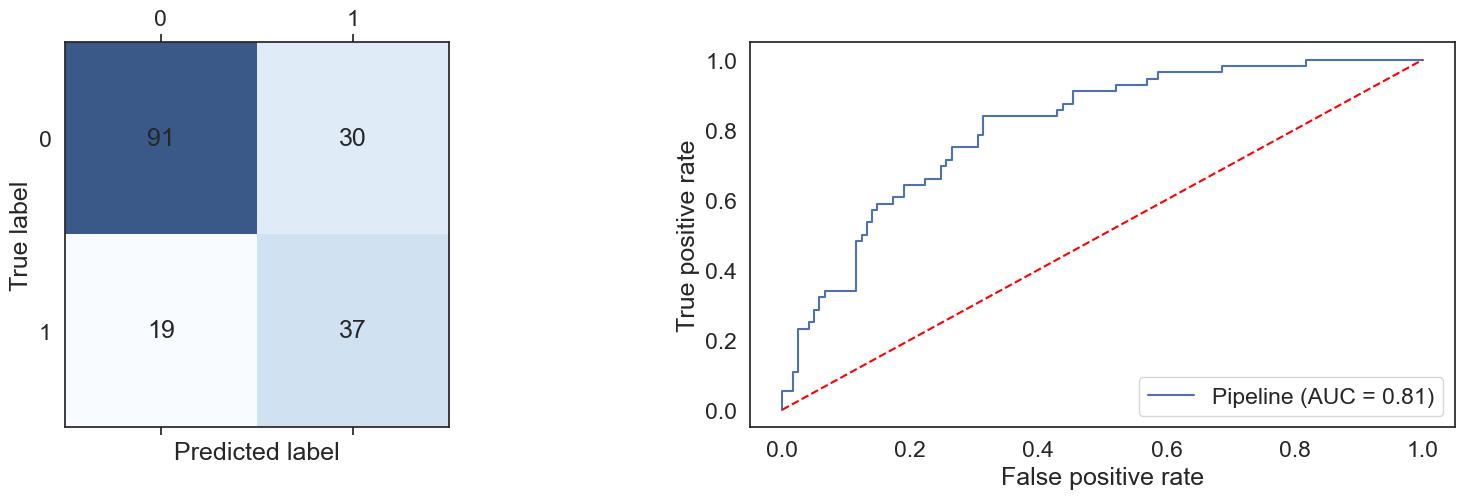

In [60]:
confusion = confusion_matrix(y_test, Pred)
print(classification_report(y_test, Pred))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1.matshow(confusion, cmap='Blues',alpha=0.8)
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        ax1.text(x=j, y=i, s=confusion[i, j], va='center', ha='center')
ax1.set_xlabel('Predicted label')
ax1.set_ylabel('True label')

RocCurveDisplay.from_estimator(Model, X_test, y_test, ax=ax2)
ax2.plot([0, 1], [0, 1], linestyle='--', color='red')
ax2.set_xlabel('False positive rate')
ax2.set_ylabel('True positive rate')

In [61]:
from sklearn.linear_model import LogisticRegression
LGR = LogisticRegression()

Param={"LGR__C":np.logspace(-3,3,7), "LGR__penalty":["l1","l2"]}

p = Pipeline([('SMT', SMT),('QUAT',QUAT),('LGR', LGR)])
Grid=GridSearchCV(p,param_grid=Param,cv=5,scoring='recall')
Grid.fit(X_train,y_train)
print(Grid.best_score_)
print(Grid.best_params_)

0.7668563300142248
{'LGR__C': 0.001, 'LGR__penalty': 'l2'}


In [62]:
Final = LogisticRegression(penalty='l2',C=0.1)

Model = Pipeline([('SMT', SMT),('QUAT',QUAT), ('Final', Final)])
Model.fit(X_train, y_train)
Pred = Model.predict(X_test)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       121
           1       0.57      0.70      0.63        56

    accuracy                           0.74       177
   macro avg       0.71      0.73      0.71       177
weighted avg       0.76      0.74      0.75       177



Text(0, 0.5, 'True positive rate')

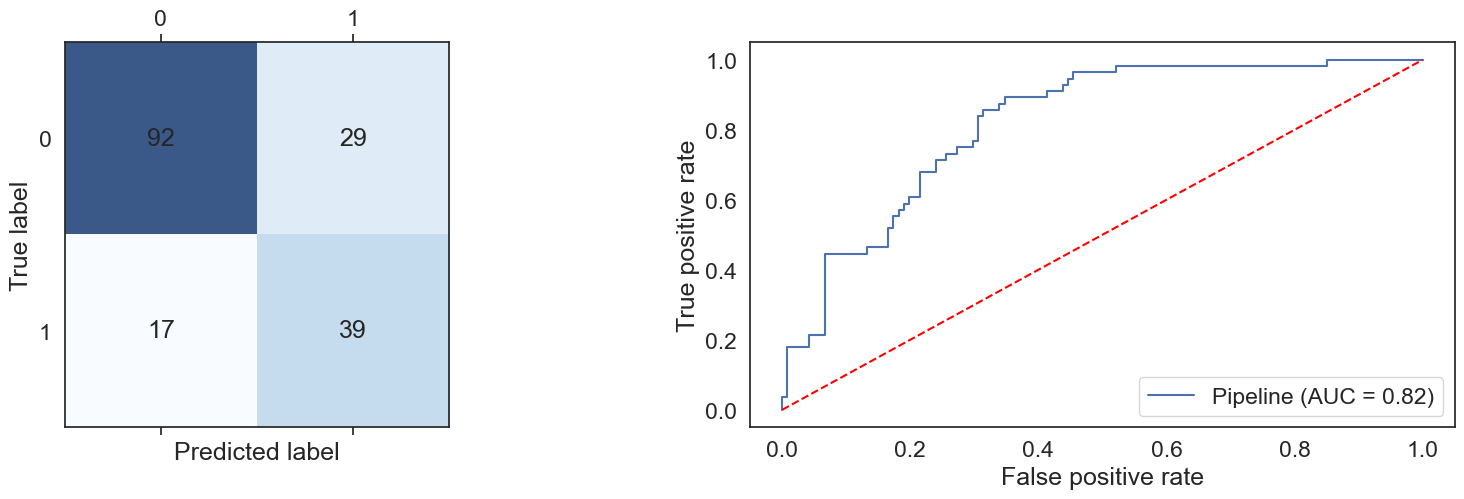

In [63]:
confusion = confusion_matrix(y_test, Pred)
print(classification_report(y_test, Pred))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1.matshow(confusion, cmap='Blues',alpha=0.8)
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        ax1.text(x=j, y=i, s=confusion[i, j], va='center', ha='center')
ax1.set_xlabel('Predicted label')
ax1.set_ylabel('True label')

RocCurveDisplay.from_estimator(Model, X_test, y_test, ax=ax2)
ax2.plot([0, 1], [0, 1], linestyle='--', color='red')
ax2.set_xlabel('False positive rate')
ax2.set_ylabel('True positive rate')

In [64]:
from sklearn.ensemble import VotingClassifier
ada = AdaBoostClassifier(learning_rate= 0.5, n_estimators= 50)
rf = RandomForestClassifier(bootstrap=True,n_estimators=600,max_depth=10)
knn = KNeighborsClassifier(n_neighbors=59)
LGR =LogisticRegression(penalty='l2',C=0.1)

X_train, y_train = SMT.fit_resample(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('ada', ada), ('rf', rf),('knn', knn)], voting='hard')
voting_clf.fit(X_train, y_train)

accuracy = voting_clf.score(X_test, y_test)
print('Voting classifier accuracy: {:.2f}'.format(accuracy))
Pred = voting_clf.predict(X_test)

Voting classifier accuracy: 0.72


              precision    recall  f1-score   support

           0       0.84      0.74      0.78       121
           1       0.55      0.70      0.61        56

    accuracy                           0.72       177
   macro avg       0.69      0.72      0.70       177
weighted avg       0.75      0.72      0.73       177



Text(0, 0.5, 'True positive rate')

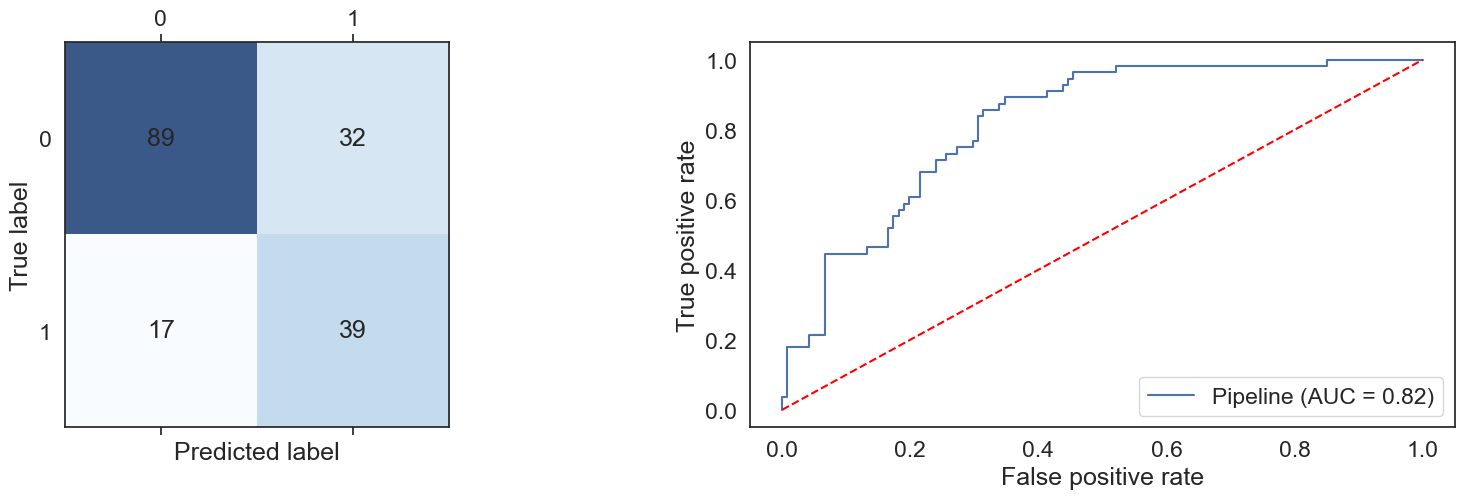

In [65]:
confusion = confusion_matrix(y_test, Pred)
print(classification_report(y_test, Pred))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1.matshow(confusion, cmap='Blues',alpha=0.8)
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        ax1.text(x=j, y=i, s=confusion[i, j], va='center', ha='center')
ax1.set_xlabel('Predicted label')
ax1.set_ylabel('True label')

RocCurveDisplay.from_estimator(Model, X_test, y_test, ax=ax2)
ax2.plot([0, 1], [0, 1], linestyle='--', color='red')
ax2.set_xlabel('False positive rate')
ax2.set_ylabel('True positive rate')

<AxesSubplot: xlabel='Model', ylabel='Recall'>

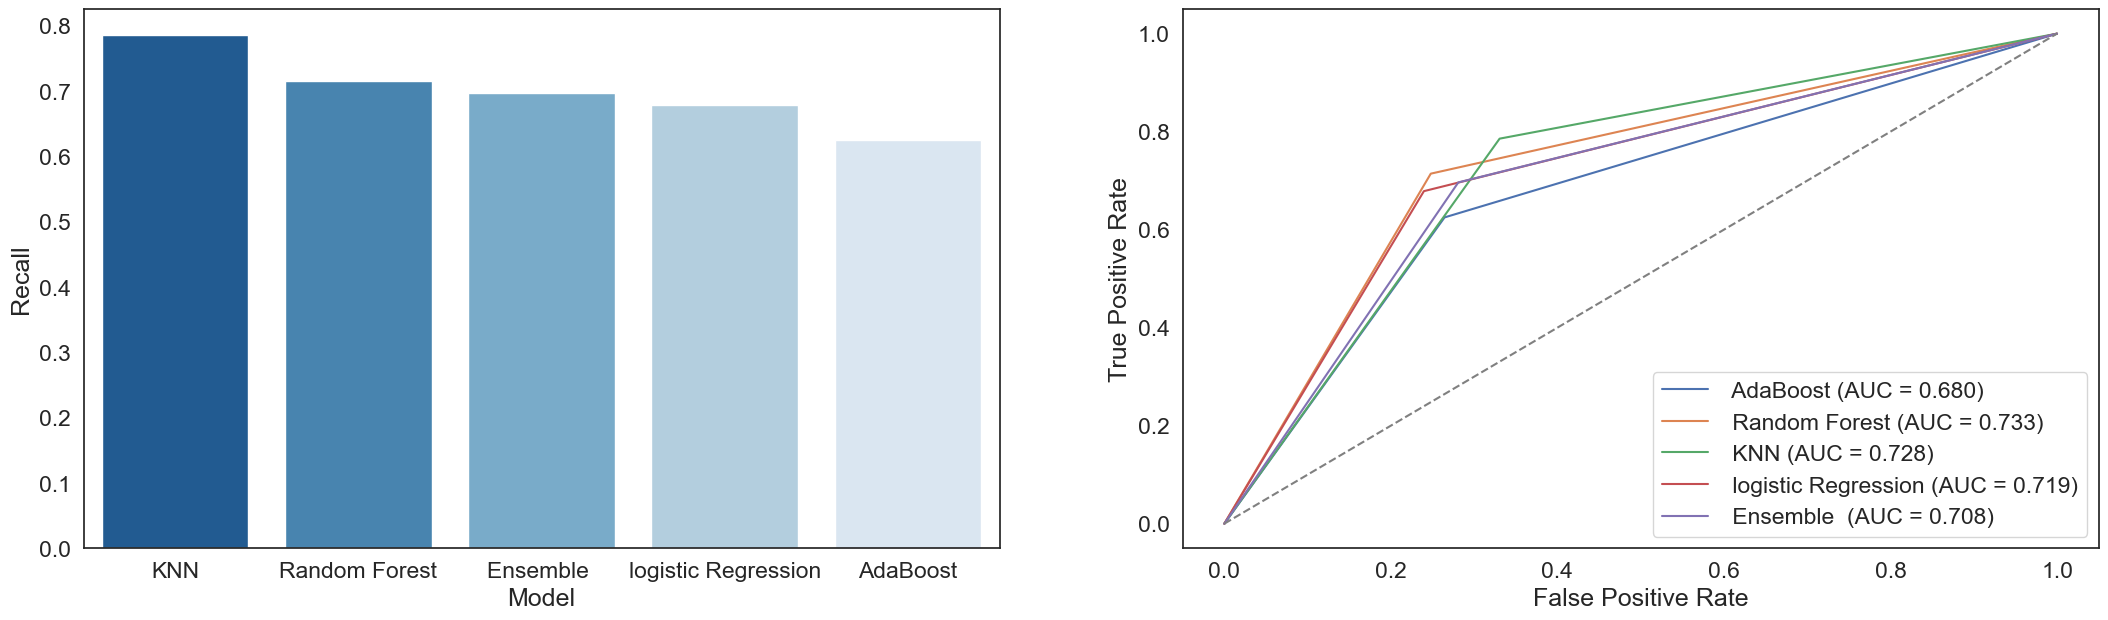

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26, 7),dpi=100)
# logistic Regression
Final = LogisticRegression(penalty='l2',C=0.1)
LGR = Pipeline([('SMT', SMT),('scaler',scaler), ('Final', Final)])
LGR.fit(X_train, y_train)
# KNN
Final = KNeighborsClassifier(n_neighbors=59)
KNN = Pipeline([('SMT', SMT),('QUAT',QUAT), ('Final', Final)])
KNN.fit(X_train, y_train)
# Random Forest
Final = RandomForestClassifier(bootstrap=True,n_estimators=600,max_depth=10)
rf = Pipeline([('SMT', SMT),('scaler',scaler), ('Final', Final)])
rf.fit(X_train, y_train)
# AdaBoost
Final = AdaBoostClassifier(learning_rate= 0.5, n_estimators= 50)
ada = Pipeline([('SMT', SMT),('scaler',scaler), ('Final', Final)])
ada.fit(X_train, y_train)
#ensemble
voting_clf = VotingClassifier(estimators=[('ada', ada), ('rf', rf),('knn', knn)], voting='hard')
voting_clf.fit(X_train, y_train)

y_pred = np.array([ada.predict(X_test), rf.predict(X_test),KNN.predict(X_test),LGR.predict(X_test),voting_clf.predict(X_test)])
model=['AdaBoost','Random Forest','KNN','logistic Regression'
      ,'Ensemble ']
recalls=[]
r=[]
Acurve=[]
for i in range(5):
    # Calculate FPR and TPR for this model
    fpr, tpr, _ = roc_curve(y_test, y_pred[i])
    roc_auc = auc(fpr, tpr)
    recalls.append([model[i],recall_score(y_test, y_pred[i])])
    r.append(recall_score(y_test, y_pred[i]))
    Acurve.append(roc_auc_score(y_test, y_pred[i]))
    plt.plot(fpr, tpr, label=' {} (AUC = {:.3f})'.format(model[i], roc_auc))

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
   
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

df = pd.DataFrame(recalls, columns=['Model', 'Recall'])
df = df.sort_values(by='Recall', ascending=False)
sns.barplot(x='Model', y='Recall', data=df, palette='Blues_r',ax=ax1)

In [68]:
plt.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (10, 5)
df = pd.DataFrame({'AUC': Acurve, 'Recall': r}, index=model)
df.style.background_gradient()

,AUC,Recall
AdaBoost,0.680269,0.625000
Random Forest,0.733176,0.714286
KNN,0.727568,0.785714
logistic Regression,0.719451,0.678571
Ensemble,0.707718,0.696429
